# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

### Key Questions
* Which variables should be used for clustering?
* How many different groups/clusters of countries can be found from the data?
* How do the different clusters vary?
* How to use PCA to retain the components which explain 90% variance?
* How to perform clustering using the components obtained from PCA?

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = "/content/drive/MyDrive/GL/Unsupervised Learning/Project - Trade and Ahead/stock_data.csv"

In [4]:
# Import data
data = pd.read_csv(url)

## Data Overview

- Observations
- Sanity checks

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [5]:
data.shape

(340, 15)

* The dataset has 340 rows and 15 columns

### Displaying few rows of the dataset

In [6]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

### Creating a copy of original data

In [7]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [8]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Observations:

* Ticker Symbol can be removed.
* Sector, GICS Sector and GICS Sub Industry will be changed to categorical data type.
* All other columns are numerical.
* There are 340 non-null records in every column.

In [9]:
# dropping the ticker symbol column, as it does not provide any information
df.drop("Ticker Symbol", axis=1, inplace=True)

In [10]:
# convert all columns with dtype object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

In [11]:
# verifying results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Security                      340 non-null    category
 1   GICS Sector                   340 non-null    category
 2   GICS Sub Industry             340 non-null    category
 3   Current Price                 340 non-null    float64 
 4   Price Change                  340 non-null    float64 
 5   Volatility                    340 non-null    float64 
 6   ROE                           340 non-null    int64   
 7   Cash Ratio                    340 non-null    int64   
 8   Net Cash Flow                 340 non-null    int64   
 9   Net Income                    340 non-null    int64   
 10  Earnings Per Share            340 non-null    float64 
 11  Estimated Shares Outstanding  340 non-null    float64 
 12  P/E Ratio                     340 non-null    floa

### Let's take a look at the summary of the data

In [12]:
# summary of categorical columns
df.describe(include='category').T

count unique                                 top freq
Security            340    340                          3M Company    1
GICS Sector         340     11                         Industrials   53
GICS Sub Industry   340    104  Oil & Gas Exploration & Production   16

Observartions:

* There are 340 unique securities, organized into 11 Sectors and 104 sub-sectors
* The sector with the most records is "Industrials" with 53.
* The sub-sector with the most records is "Oil & Gas Exploration & Production" with 16.

In [13]:
# summary of numerical columns
df.describe().T

count          mean           std           min  \
Current Price                 340.0  8.086234e+01  9.805509e+01  4.500000e+00   
Price Change                  340.0  4.078194e+00  1.200634e+01 -4.712969e+01   
Volatility                    340.0  1.525976e+00  5.917984e-01  7.331632e-01   
ROE                           340.0  3.959706e+01  9.654754e+01  1.000000e+00   
Cash Ratio                    340.0  7.002353e+01  9.042133e+01  0.000000e+00   
Net Cash Flow                 340.0  5.553762e+07  1.946365e+09 -1.120800e+10   
Net Income                    340.0  1.494385e+09  3.940150e+09 -2.352800e+10   
Earnings Per Share            340.0  2.776662e+00  6.587779e+00 -6.120000e+01   
Estimated Shares Outstanding  340.0  5.770283e+08  8.458496e+08  2.767216e+07   
P/E Ratio                     340.0  3.261256e+01  4.434873e+01  2.935451e+00   
P/B Ratio                     340.0 -1.718249e+00  1.396691e+01 -7.611908e+01   

                                       25%           50%           75%  \
Current Price                 3.855500e+01  5.970500e+01  9.288000e+01   
Price Change                 -9.394838e-01  4.819505e+00  1.069549e+01   
Volatility                    1.134878e+00  1.385593e+00  1.695549e+00   
ROE                           9.750000e+00  1.500000e+01  2.700000e+01   
Cash Ratio                    1.800000e+01  4.700000e+01  9.900000e+01   
Net Cash Flow                -1.939065e+08  2.098000e+06  1.698108e+08   
Net Income                    3.523012e+08  7.073360e+08  1.899000e+09   
Earnings Per Share            1.557500e+00  2.895000e+00  4.620000e+00   
Estimated Shares Outstanding  1.588482e+08  3.096751e+08  5.731175e+08   
P/E Ratio                     1.504465e+01  2.081988e+01  3.176476e+01   
P/B Ratio                    -4.352056e+00 -1.067170e+00  3.917066e+00   

                                       max  
Current Price                 1.274950e+03  
Price Change                  5.505168e+01  
Volatility                    4.580042e+00  
ROE                           9.170000e+02  
Cash Ratio                    9.580000e+02  
Net Cash Flow                 2.076400e+10  
Net Income                    2.444200e+10  
Earnings Per Share            5.009000e+01  
Estimated Shares Outstanding  6.159292e+09  
P/E Ratio                     5.280391e+02  
P/B Ratio                     1.290646e+02

Observartions:

* Expected values
  * Current Price: Average = 80.86 (Median = 59.71)
  * Price Change: Average = +4.08 (Median = +4.82)
  * Volatility: Average = 1.53 (Median = 1.39)
  * ROE: Average = 39.60 (Median = 15.00)
  * Cash Ratio: Average = 70.02 (Median = 47.00)
  * Net Cash Flow: Average = 55,537,620.00 (Median = 2,098,000.00)
  * Net Income: Average = 1,494,384,602 (Median = 707,336,000.00)
  * Earnings Per Share: Average = 2,776,662.00 (Median = 2,895,000.00)
  * Estimated Shares Outstanding: Average = 577,028,300.00 (Median = 309,675,100.00)
  * P/E Ratio: Average = 32.61 (Median = 20.82)
  * P/B Ratio: Average = -1.72 (Median = -1.07)


* Many of the distributions indicate postive skew (mean values significantly higher tham median values).
* There are no suspect/implausible MIN or MAX values that require further investigation.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

Categorical Data

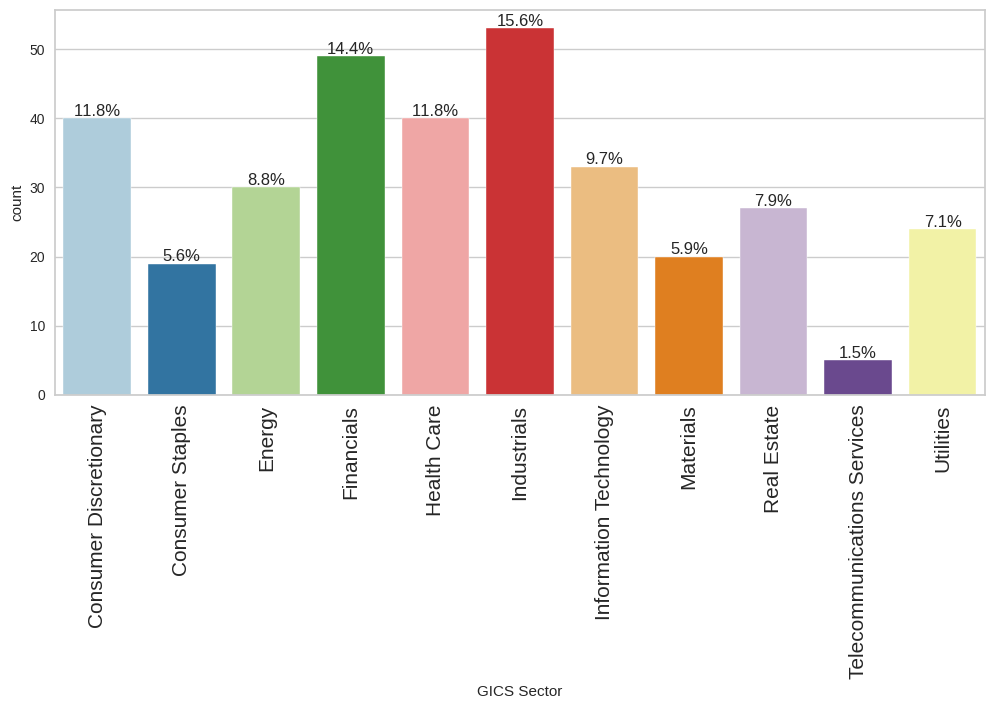

In [16]:
# GICS Sector
labeled_barplot(df, 'GICS Sector', perc=True)

In [17]:
# Calculate the top four sectors (those with > 10%) by number of stocks
top_four = df["GICS Sector"].value_counts().head(n=4)

# Calculate the cumulative percentage
top_four_cum = (df["GICS Sector"].value_counts(normalize=True).head(n=4).sum()) * 100

# Print the results
print(f"The top 4 sectors (by number of stocks) are:\n\n{top_four}\n")
print(f"These top 4 sectors account for {top_four_cum:.2f}% of the data.\n")

The top 4 sectors (by number of stocks) are:

Industrials               53
Financials                49
Consumer Discretionary    40
Health Care               40
Name: GICS Sector, dtype: int64

These top 4 sectors account for 53.53% of the data.



*Observations on the economic sector classification:*

* From the graph we can see that four economic sectors hold double-digit proportions of the stocks represented in the data: Industrials, Financials, Consumer Discretionary, and Health Care.
* These top four sectors account for more than half of the stocks represented in the data.
* The Industrial sector has the greatest percentage (15.6%) while Telecommunication Services have the lowest (1.5%).






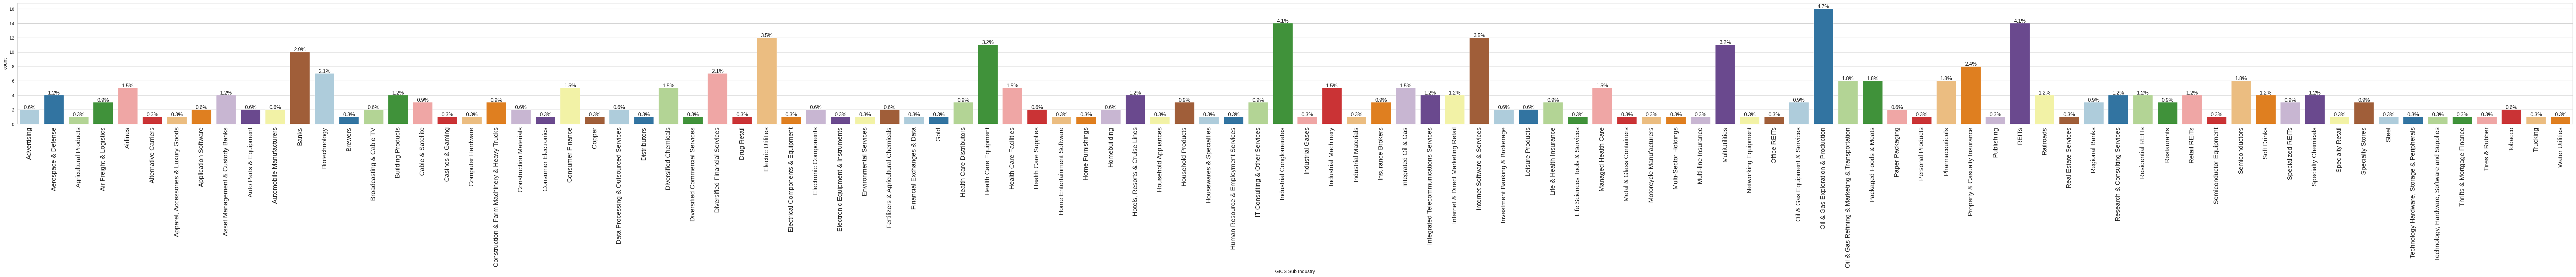

In [18]:
# GICS Sub Industry
labeled_barplot(df, 'GICS Sub Industry', perc=True)

In [19]:
# Calculate the number of subsectors
total_sub = df["GICS Sub Industry"].nunique()
print(f"[NOTE: The total number of sub-sectors: {total_sub}]\n")

# Calculate the top seven sub-sectors (those with > 3%) by number of stocks
top_seven_sub = df["GICS Sub Industry"].value_counts().head(n=7)

# Calculate the cumulative percentage
top_seven_sub_cum = (df["GICS Sub Industry"].value_counts(normalize=True).head(n=4).sum()) * 100

# Print the results
print(f"The top 7 sub-sectors (by number of stocks) are:\n\n{top_seven_sub}\n")
print(f"These top 7 sub-sectors account for {top_seven_sub_cum:.2f}% of the data.\n")

[NOTE: The total number of sub-sectors: 104]

The top 7 sub-sectors (by number of stocks) are:

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
MultiUtilities                        11
Health Care Equipment                 11
Name: GICS Sub Industry, dtype: int64

These top 7 sub-sectors account for 16.47% of the data.



*Observations on the economic sub-sector classification:*

* There are 104 different economic sub-sectors in the data.
* From the graph we can see that only 7 sub-sectors represent more than 3% of the stocks: Oil & Gas Exploration & Production, REITs, Industrial Conglomerates, Internet Software & Services, Electric Utilities, MultiUtilities, Health Care Equipment.
* These seven sub-sectors account for roughly 1 out of every 6 stocks represented in the data.
* The Oil & Gas Exploration & Production subsector has the greatest percentage (4.7%).

Numerical Data

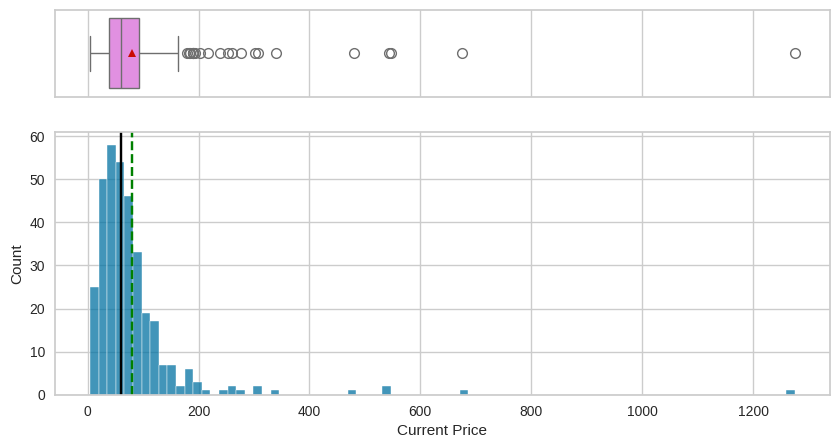

In [20]:
# Current Price
histogram_boxplot(df, 'Current Price')

*Observations on Current Price:*

* The distribution is clearly right-skewed (which results in a mean current price that is higher than the median current price).
* There are a considerable number of high outliers in the data.



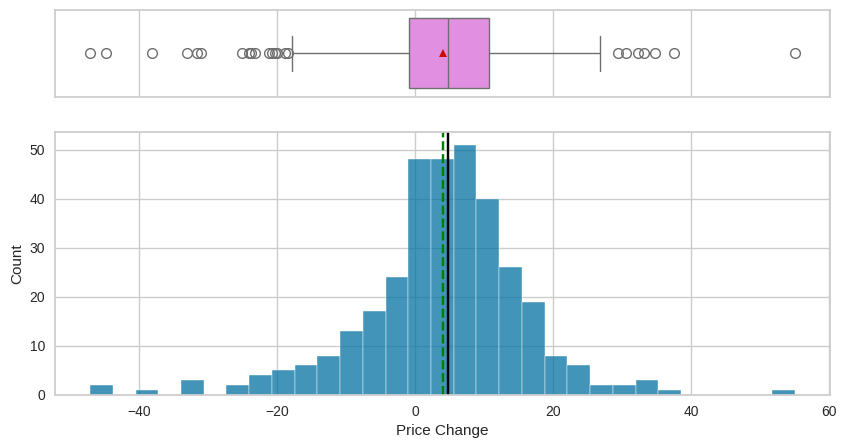

In [21]:
# Price Change
histogram_boxplot(df, 'Price Change')

*Observations on Price Change:*

* The distribution appears to be approximately normal (with a mean daily price change that is very close to the median daily price change).
* There are both low and high outliers in the data.

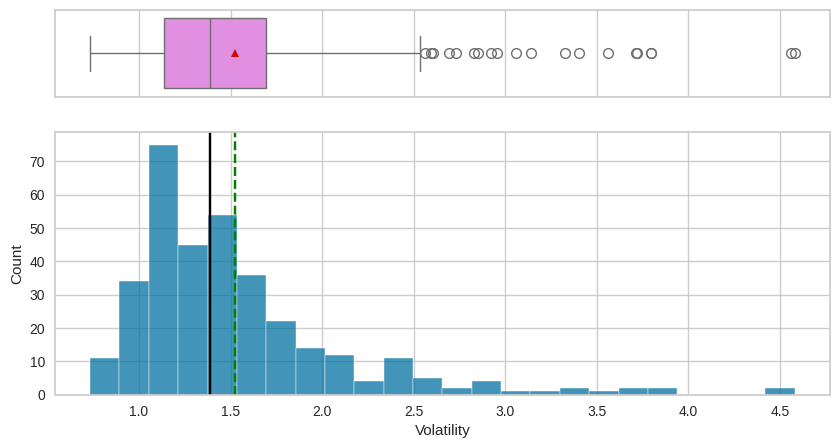

In [22]:
# Volatility
histogram_boxplot(df, 'Volatility')

*Observations on Volatility:*

* The distribution is clearly right-skewed (which results in a mean price fluctuation that is higher than the median price fluctuation).
* There are a number of high outliers in the data.


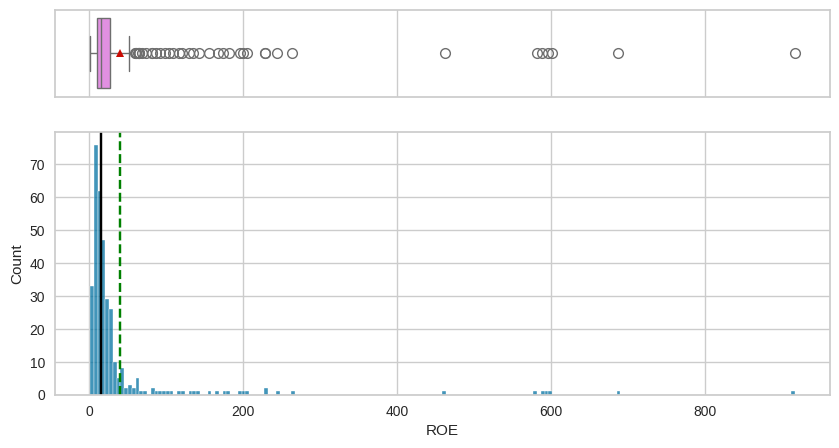

In [23]:
# ROE
histogram_boxplot(df, 'ROE')

*Observations on Return on Equity:*

* The distribution is clearly right-skewed (which results in a mean ROE that is higher than the median ROE).
* There are a considerable number of high outliers in the data.

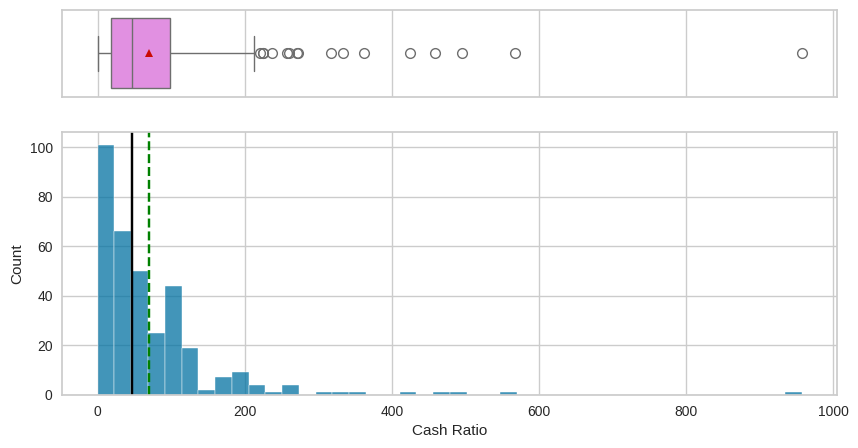

In [24]:
# Cash Ratio
histogram_boxplot(df, 'Cash Ratio')

*Observations on Return on Cash Ratio:*

* The distribution is clearly right-skewed (which results in a mean cash ratio that is higher than the median cash ratio).
* There are a considerable number of high outliers in the data.


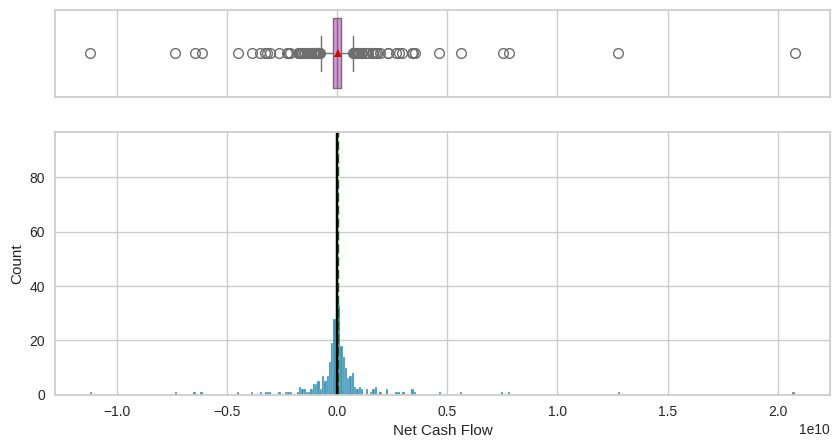

In [25]:
# Net Cash Flow
histogram_boxplot(df, 'Net Cash Flow')

*Observations on Net Cash Flow:*

* The distribution appears to be approximately normal (with a mean net cash flow that is very close to the median net cash flow).
* There are both low and high outliers in the data.

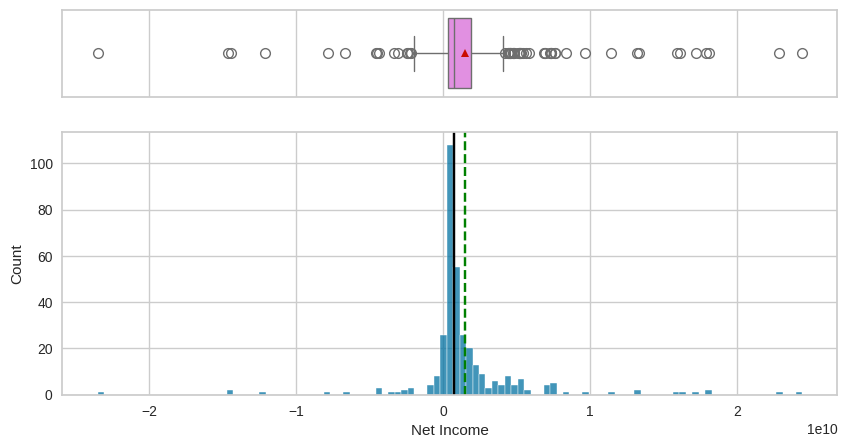

In [26]:
# Net Income
histogram_boxplot(df, 'Net Income')

*Observations on Net Income:*

* The distribution appears to be approximately normal (with a mean net income that is very close to the median net income).
* There are a considerable number of both low and high outliers in the data.

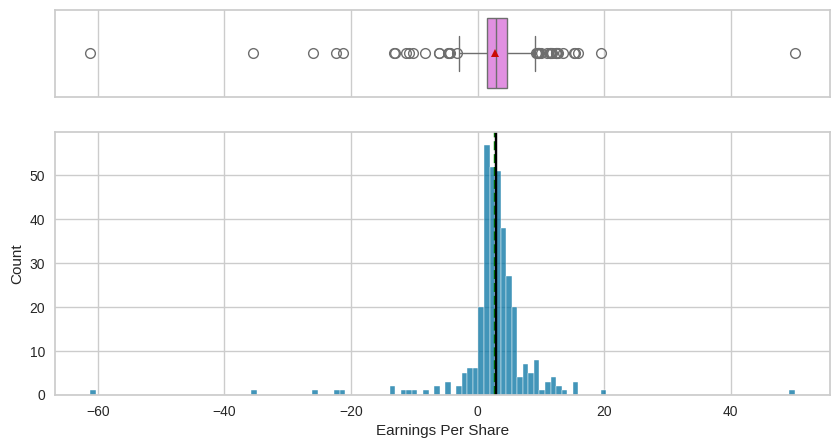

In [27]:
# Earnings Per Share
histogram_boxplot(df, 'Earnings Per Share')

*Observations on Earnings Per Share:*

* The distribution appears to be approximately normal (with mean earnings per share very close to median earnings per share).
* There are both low and high outliers in the data.

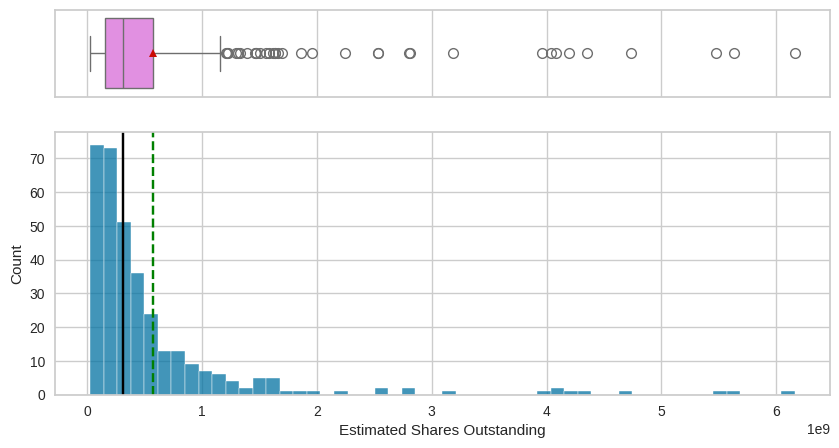

In [28]:
# Estimated Shares Outstanding
histogram_boxplot(df, 'Estimated Shares Outstanding')

*Observations on Estimated Shares Outstanding:*

* The distribution is very right-skewed (which results in a mean number of estimated shares outstanding that is higher than the median estimated shares outstanding).
* There are a considerable number of high outliers in the data.

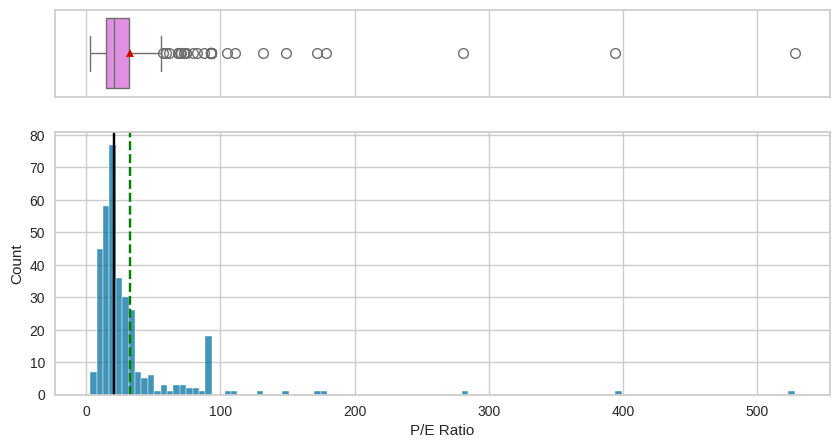

In [29]:
# P/E Ratio
histogram_boxplot(df, 'P/E Ratio')

*Observations on Price-to-Earnings Ratio:*

* The distribution is stongly right-skewed (with a mean P/E Ratio that is higher than the median P/E Ratio).
* There are a considerable number of high outliers in the data.

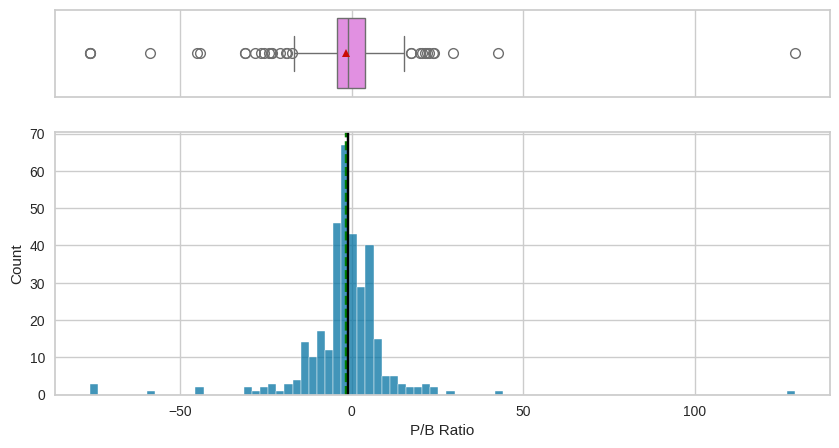

In [30]:
# P/B Ratio
histogram_boxplot(df, 'P/B Ratio')

*Observations on Price-to-Book Ratio:*

* The distribution appears to be approximately normal (with a mean P/B Ratio that is very close to median P/B Ratio).
* There are both low and high outliers in the data.*italicized text*

### Bivariate Analysis




**Correlations between numerical variables**

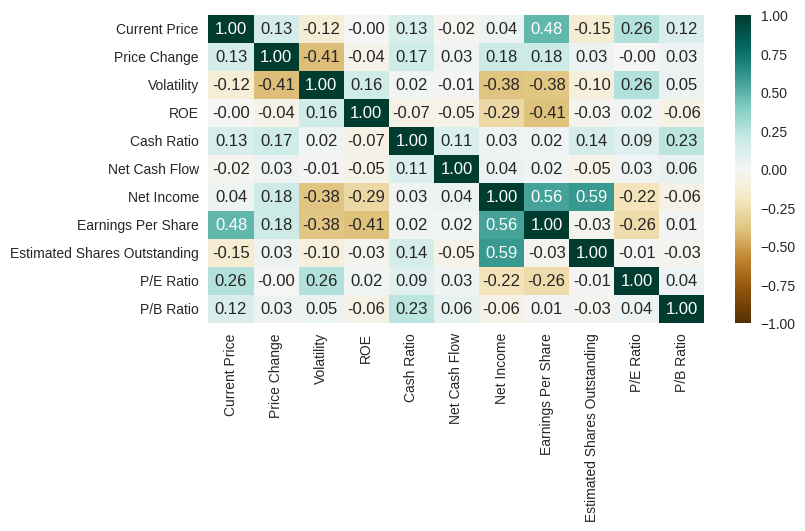

In [31]:
# correlation check
plt.figure(figsize=(8, 4))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="BrBG"
)
plt.show()

Observations:

* There is a moderately high positive correlation between Net Income, Earnings Per Share, and Estimated Shares Outstanding. This makes sense, suggesting a common relationship to profitability. Likewise, Earnings Per Share shows a moderately high positive correlation with Current Price.
* Volatility is negatively correlated with Price Vhange (as a stock becomes more volatile, its price is typically dropping), Net Income (higher net income is associated with less volatility), and Earnings Per Share (volatile stock prices are correlated to lower earnings per share).
* Earnings Per Share is positively correlated with current price. As a company's EPS rises, its prices may also be likely to increase.
* Earnings Per Share is negatively correlated with Return On Equity. This may be due to other factors, such as a company issuing additional shares, holding a high level of debt financing, or be due tio write-offs which reduce net income.


**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

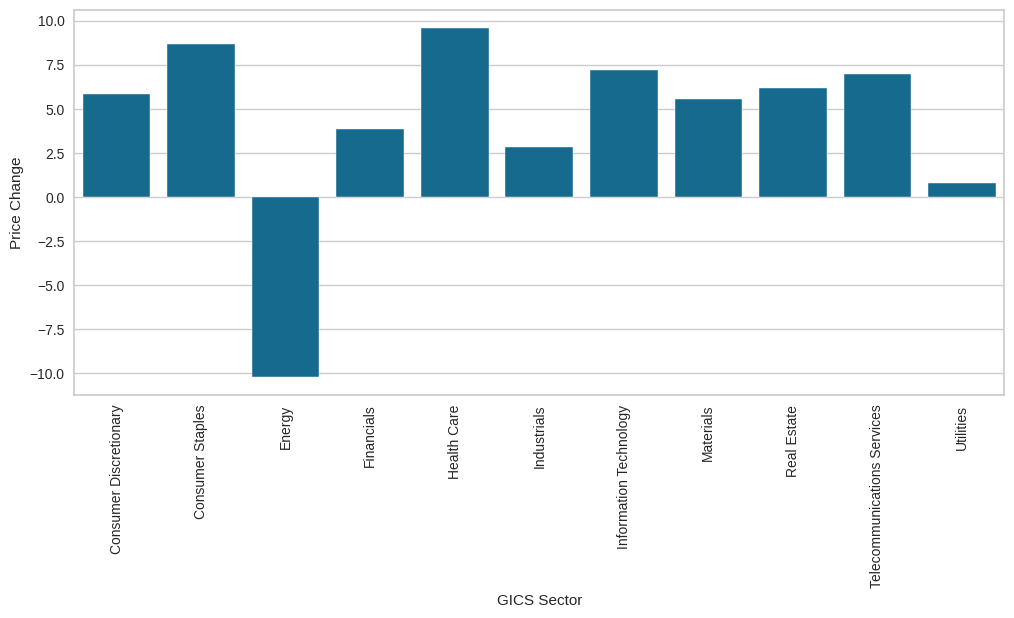

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

In [33]:
df.groupby(['GICS Sector'])['Price Change'].mean().sort_values(ascending = False)

GICS Sector
Health Care                     9.585652
Consumer Staples                8.684750
Information Technology          7.217476
Telecommunications Services     6.956980
Real Estate                     6.205548
Consumer Discretionary          5.846093
Materials                       5.589738
Financials                      3.865406
Industrials                     2.833127
Utilities                       0.803657
Energy                        -10.228289
Name: Price Change, dtype: float64

Observations:

* The Health Care sector shows the greatest average price increase over the previous period (9.586), followed by Consumer Staples (8.684750) and Information Technology (7.217).
* The Energy sector shows a significant negative change in stock price over the previous period (-10.228).

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

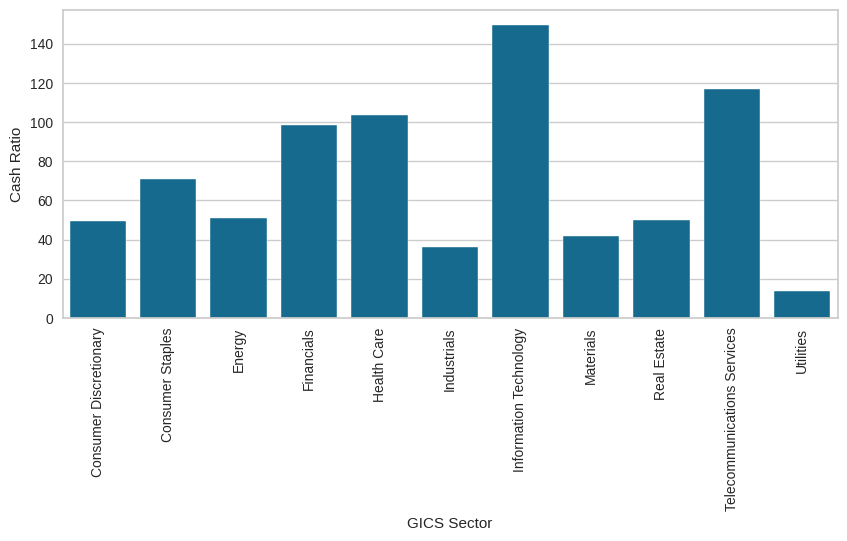

In [34]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

In [35]:
df.groupby(['GICS Sector'])['Cash Ratio'].mean().sort_values(ascending = False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

Observations:

* The highest average Cash Ratios are seen in Information Technology sector (149.818), the Telecommunications Services sector (117.000), and the Health Care sector (103.775).  Companies in these sectors often require ample cash reserves for research and development, investment in new technologies, potential legal liabilities, and adapting to rapidly changing market conditions.

* The lowest average Cash Ratios are seen in the Utilities sector (13.625), the Industrials sector (36.189), and the Materials sector (41.700). Companies in these sectors often face upfront capital investments, maintenance, and regulatory compliance which may limit available cash for short-term obligations.



**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

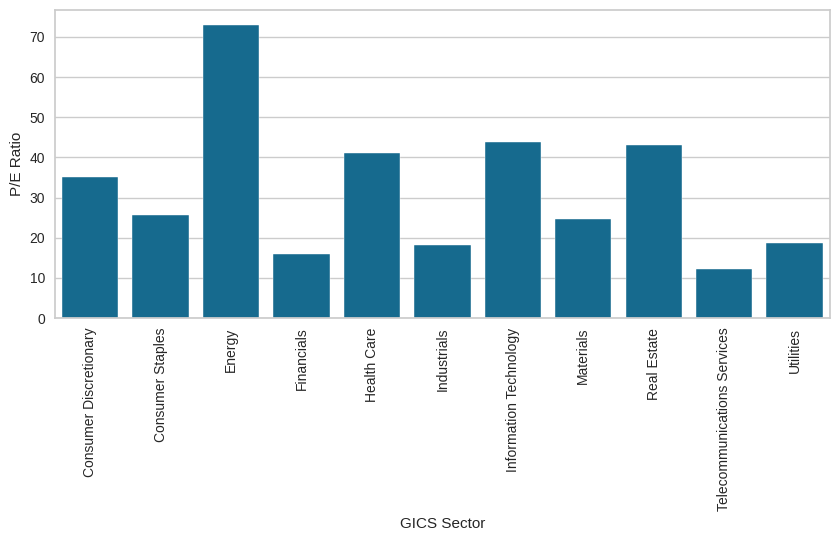

In [36]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False) ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

In [37]:
df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

Observations:

* The sectors with the highest P/E ratios are the Energy sector (72.898), Information Technology sector (43.783), the Real Estate sector (43.066), and the Health Care sector (41.135). This can likely be attributed to expectations of strong earnings growth, favorable industry dynamics, profit margins, investor sentiment, and valuation comparisons relative to other sectors.

* The sectors with the lowest P/E ratios are the Telecommunications Services sector (12.223), the Financials sector (16.023), Industrials sector (18.259), and the Utilities sector (18.719). This can likely be attributed to factors such as growth expectations, regulatory constraints, economic sensitivity, profit margins, risk perception, and market dynamics specific to each sector.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

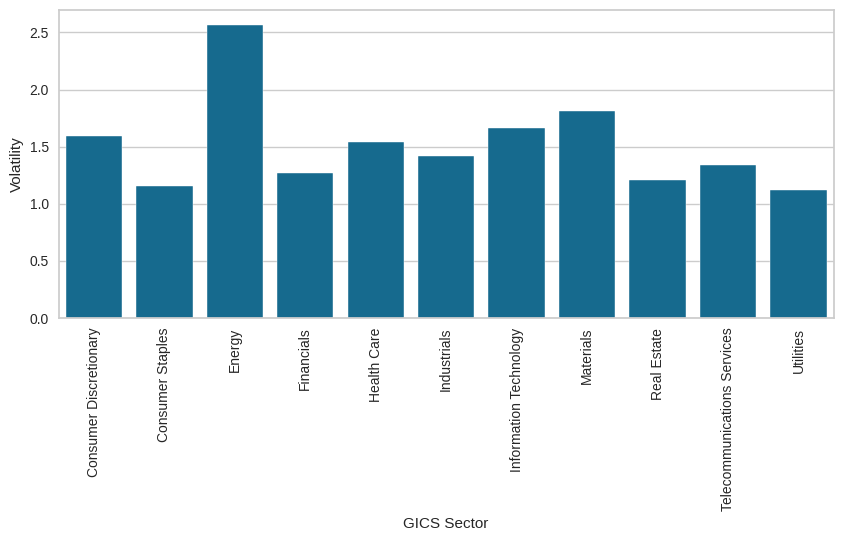

In [38]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False) ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

In [39]:
df.groupby(['GICS Sector'])['Volatility'].mean().sort_values(ascending = False)

GICS Sector
Energy                         2.568777
Materials                      1.816726
Information Technology         1.659801
Consumer Discretionary         1.595478
Health Care                    1.541023
Industrials                    1.416989
Telecommunications Services    1.341612
Financials                     1.267255
Real Estate                    1.206053
Consumer Staples               1.152675
Utilities                      1.118018
Name: Volatility, dtype: float64

Observations:

* The sectors with the highest high stock price volatility are the Energy sector (2.560), and the Materials sector (1.817). This can likely be attributed to their sensitivity to commodity price fluctuations, global economic conditions, regulatory factors, market dynamics, and supply chain disruptions.

* The sectors with the lowest stock price volatility are the Utilities sector (1.118), the Consumer Staples sector (1.153), and the Real Estate sector (1.206). This can likely be attributed to stable demand patterns, regulatory stability, income-generating properties, and resilience to economic downturns.


## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Duplicate value check

In [40]:
# Check for duplicate values
df.duplicated().sum()

0

* There are no duplicated values.

### Missing value treatment

In [41]:
# Check for missing values in training set
df.isna().sum()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There are no missing values.

### Outlier Check

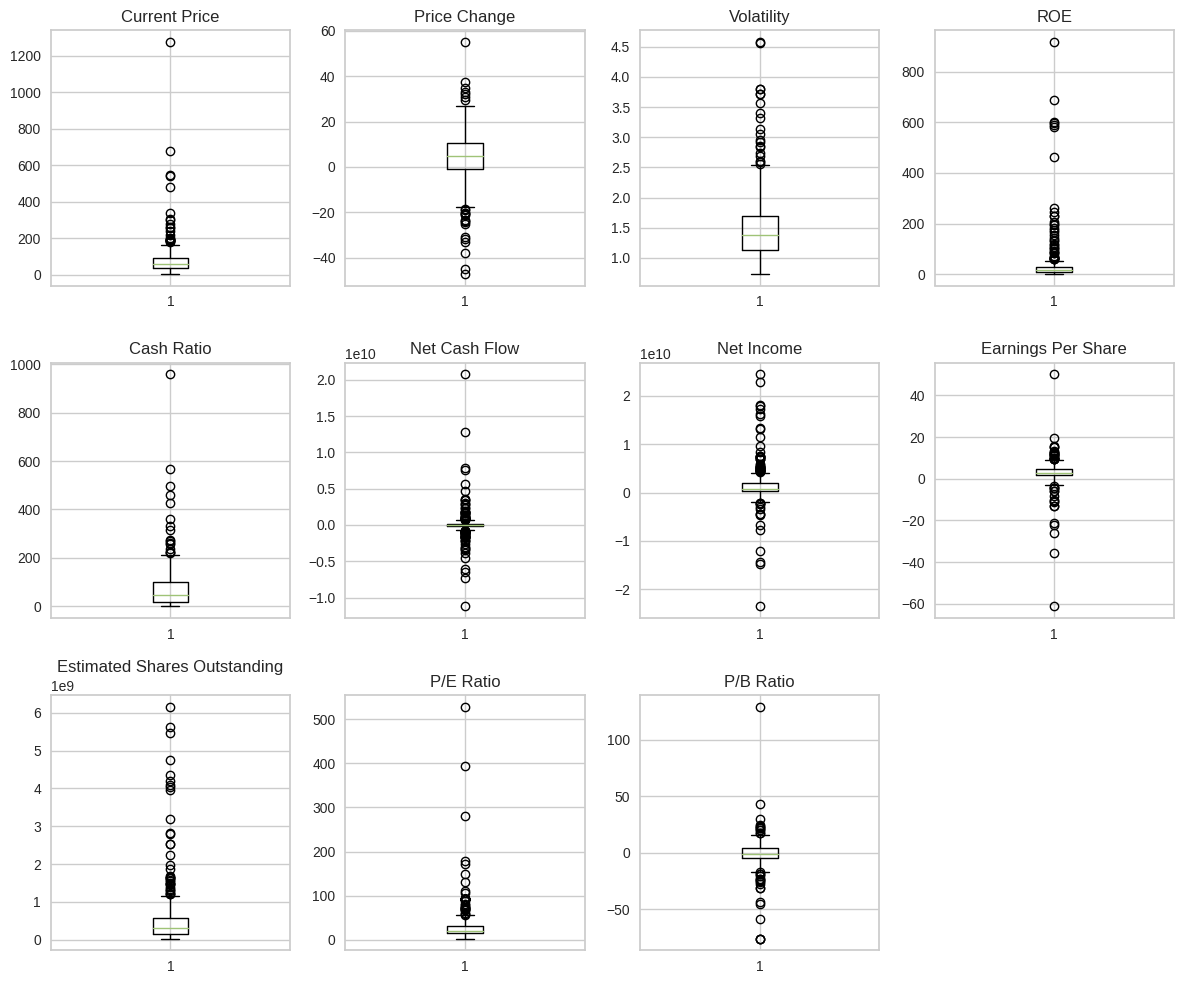

In [42]:
# Plot the boxplots of all numerical columns to check for outliers.

plt.figure(figsize=(12, 10))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* While all features exhibit a number of outliers, there is no indication to suggest that these outliers are implausible, considering the inherent volatility of stock prices as seen over time.
* This observation is backed by what we saw in the numnerical summaries earlier in the analysis.

### Scaling the Data

In [43]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [44]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)


In [45]:
# checking the new dataframe
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

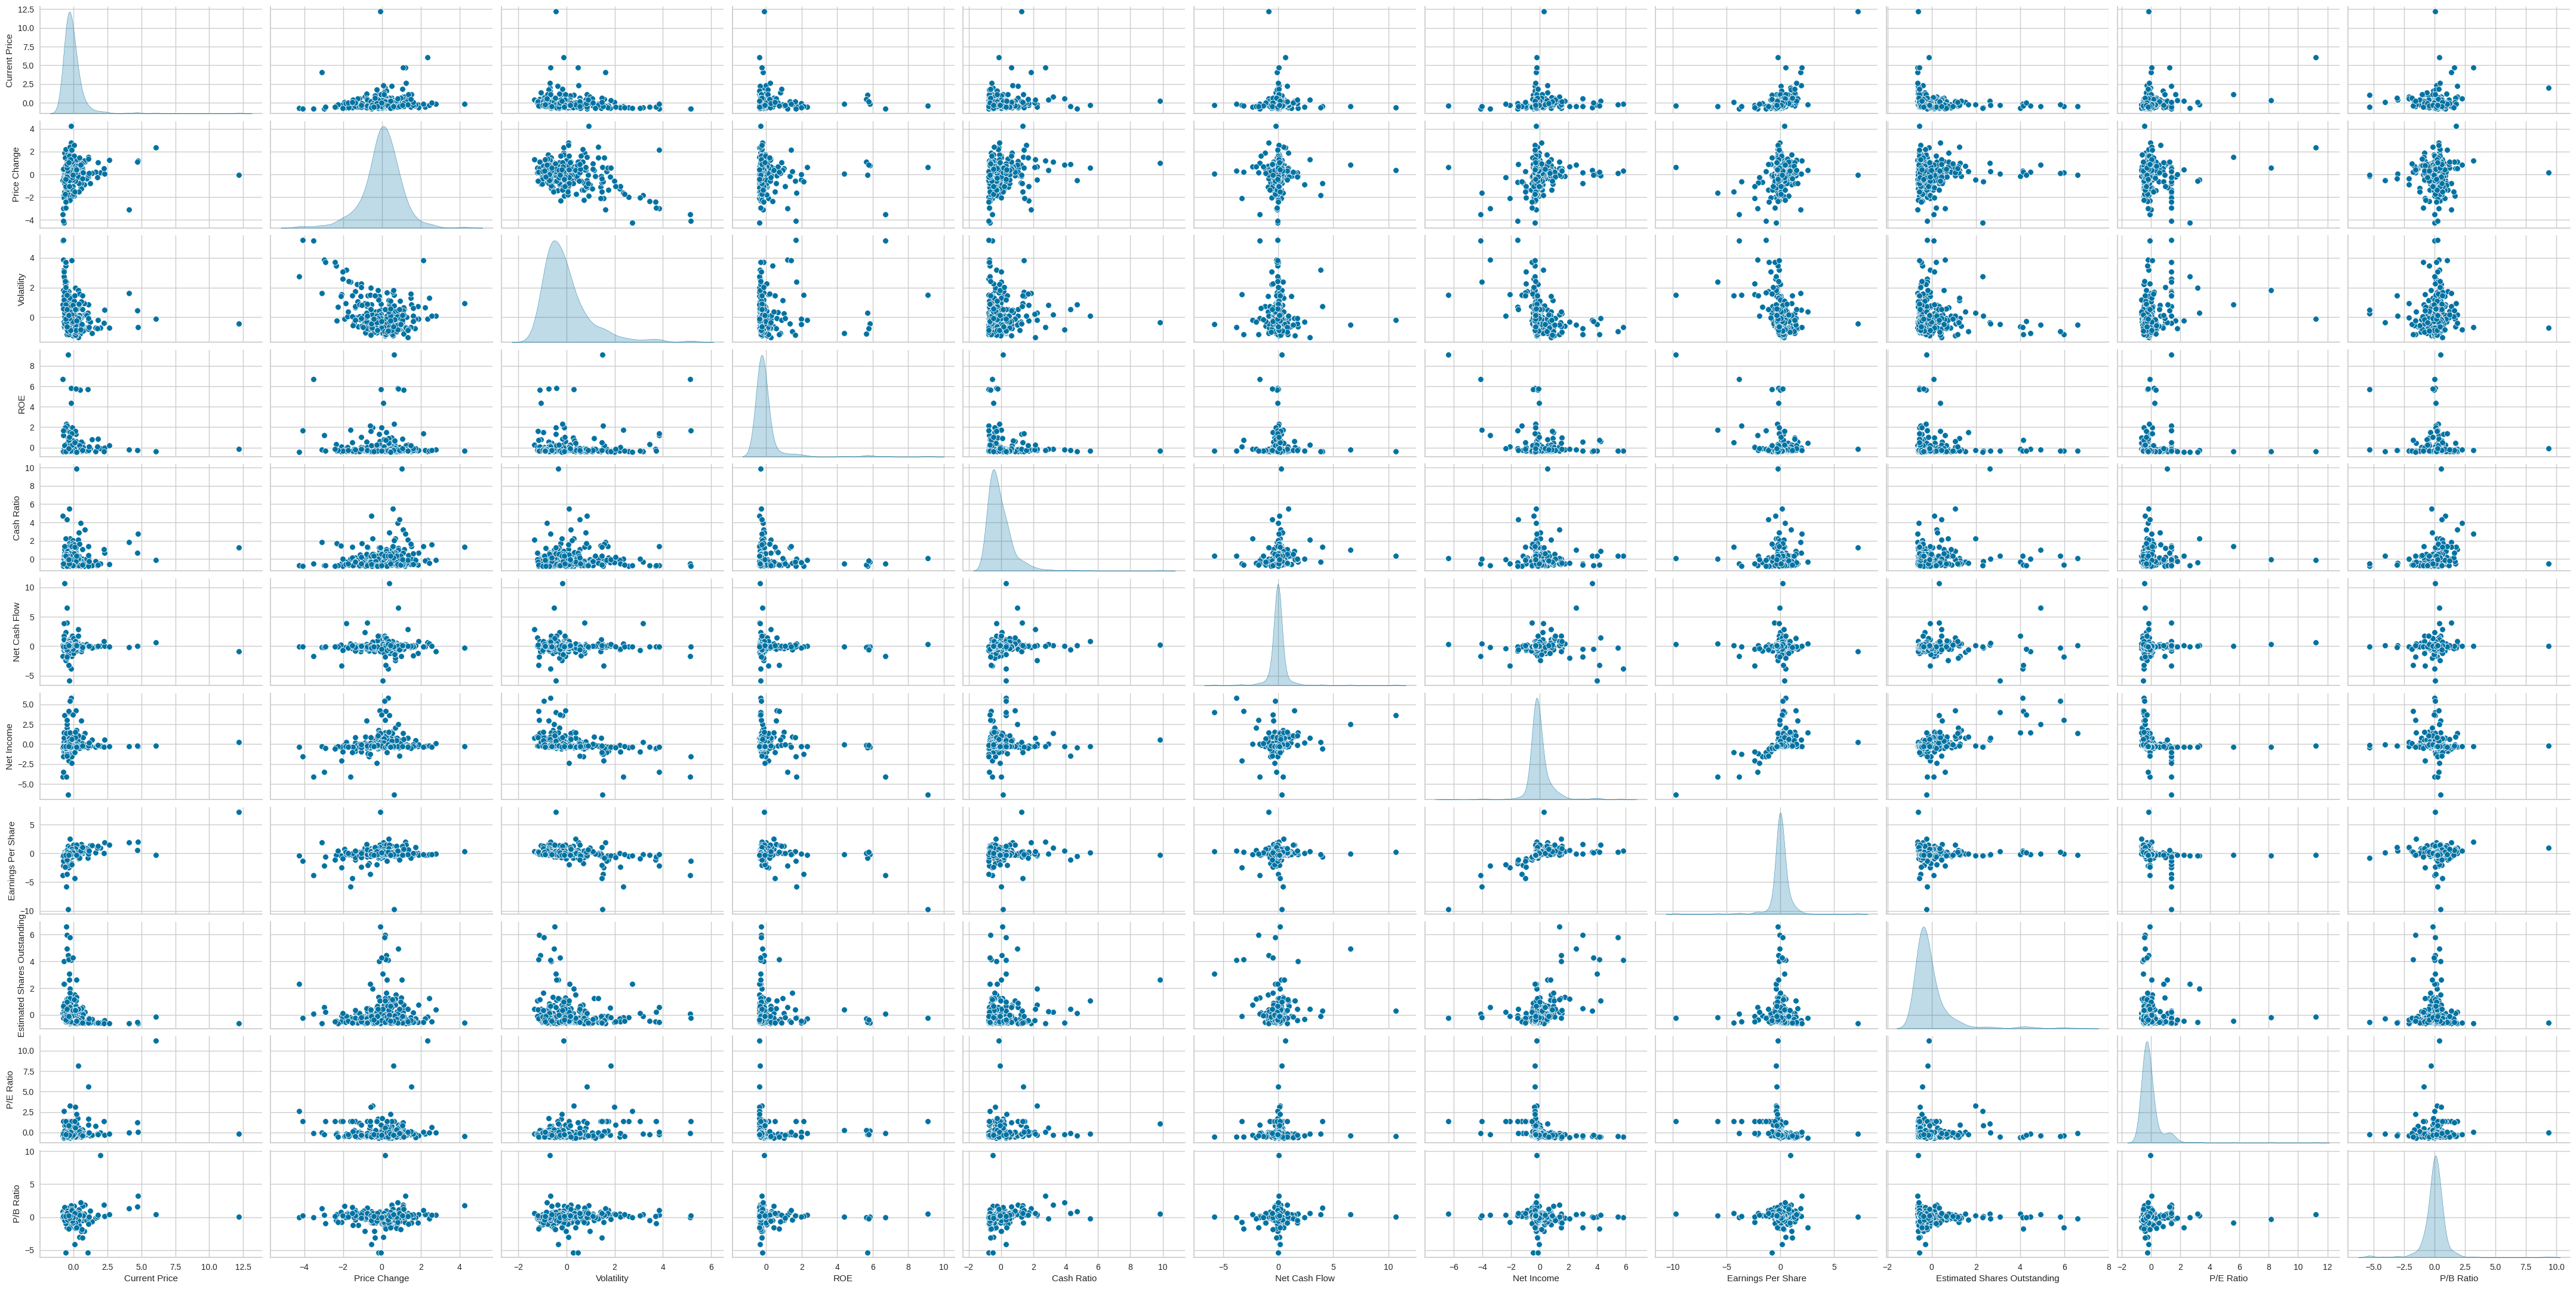

In [46]:
#create pairplot for scaled dataframe
sns.pairplot(subset_scaled_df, height=2,aspect=2 , diag_kind='kde')
plt.show()

Observations:

* A close look at the graphs on the diagonal shows many multimodal distributions. It appears that KMeans Clustering may need 3-4 clusters (or more) to separate the data into adequately distinct groups.

## K-means Clustering

In [47]:
# copy scaled dataframe
k_means_df = subset_scaled_df.copy()

In [48]:
# Find the average distortion in different potential clusters

clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)



Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2603612005599585
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.131715108373145
Number of Clusters: 6 	Average Distortion: 2.0598763618226803
Number of Clusters: 7 	Average Distortion: 2.01213392603549
Number of Clusters: 8 	Average Distortion: 1.9994328132941857
Number of Clusters: 9 	Average Distortion: 1.9247285037268589
Number of Clusters: 10 	Average Distortion: 1.8539203373868955
Number of Clusters: 11 	Average Distortion: 1.8149636050068858
Number of Clusters: 12 	Average Distortion: 1.7604329006627772
Number of Clusters: 13 	Average Distortion: 1.7489463888565202
Number of Clusters: 14 	Average Distortion: 1.6807389477433747


Observations:

* As the number of clusters increases, the average distortion generally decreases. This is expected because with more clusters, data points are likely to be closer to their respective cluster centers, resulting in lower distortion.
* The rate of decrease in distortion slows down as the number of clusters increases. This is evident from the fact that the decrease in distortion from 10 clusters to 11 clusters is smaller compared to the decrease from 2 clusters to 3 clusters, for example.
* Will we investigate further with a visualization, and look for an "elbow" point in the plot of distortion against the number of clusters, but it seems that around 5 or 6 clusters might be a reasonable choice since the rate of decrease in distortion starts to slow down noticeably after that point.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

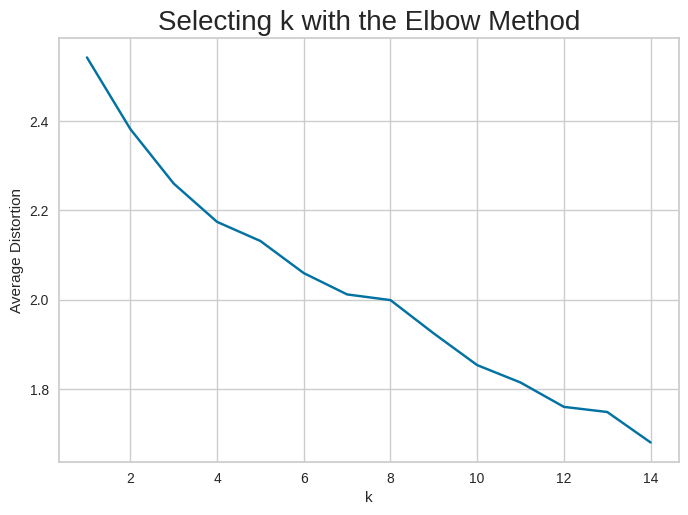

In [49]:
# Visually inspect the relationship between the number of clusters and the distortion to
# help determine the optimal number of clusters. We will look for an "elbow" point in the
# plot of distortion against the number of clusters.

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

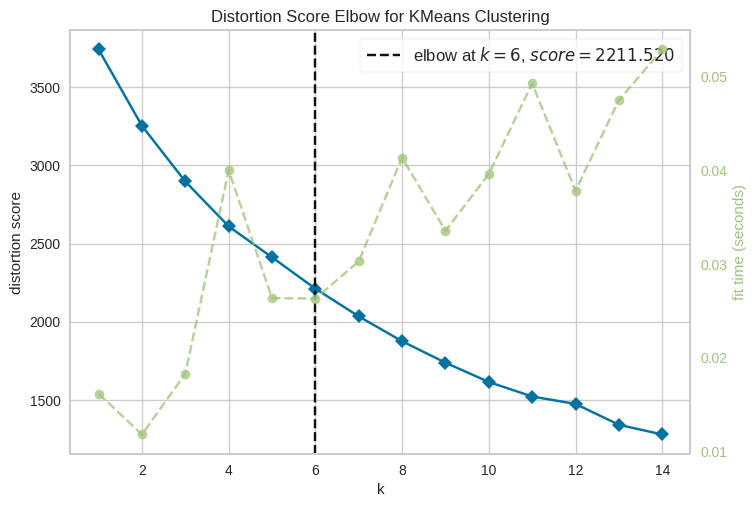

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
# Plotting distortions with method using KElbowVisualizer to indicate optimal K value
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure


Observation:

* The appropriate value of k from the elbow curve seems to be between 4 or 5.

### Check the silhouette scores

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45797710447228496
For n_clusters = 4, silhouette score is 0.45017906939331087
For n_clusters = 5, silhouette score is 0.402932236144343
For n_clusters = 6, silhouette score is 0.4118459845534201
For n_clusters = 7, silhouette score is 0.39397699902210176
For n_clusters = 8, silhouette score is 0.3451545104605459
For n_clusters = 9, silhouette score is 0.41252387300312193
For n_clusters = 10, silhouette score is 0.15248306043525572
For n_clusters = 11, silhouette score is 0.14547527734822369
For n_clusters = 12, silhouette score is 0.109888835910011
For n_clusters = 13, silhouette score is 0.16435888262634815
For n_clusters = 14, silhouette score is 0.15706251995254603


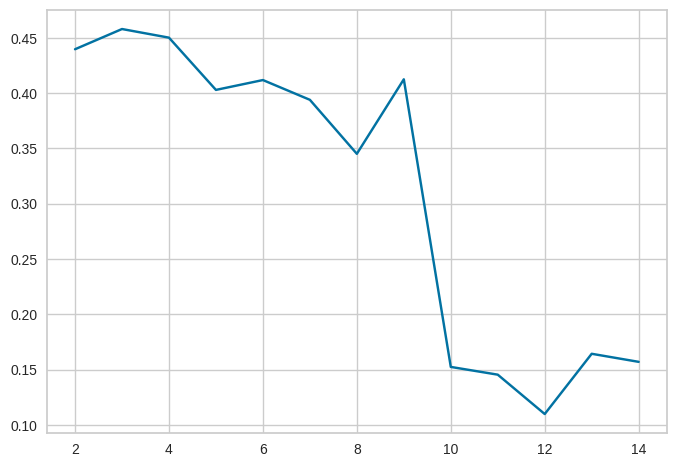

In [51]:
# Find the silhouette score (a measure of how similar an object is to its own cluster compared to other clusters) for different potential clusters
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

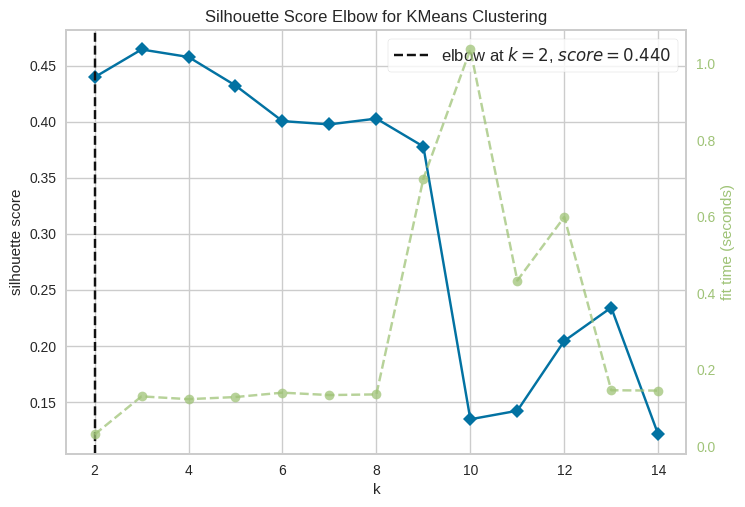

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [52]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

Observations:

* For 2 clusters, the silhouette score is 0.447, which indicates a reasonable separation between the clusters.
* For 3 clusters, the silhouette score is 0.464, suggesting even better separation and cohesion compared to 2 clusters.
* However, as the number of clusters increases beyond 3, the silhouette scores start to decrease, indicating that the quality of clustering is decreasing, suggesting that adding more clusters might not necessarily improve the clustering quality.
* For 5 clusters and above, the silhouette scores drop below 0.4, indicating poor clustering quality.
* Notably, for 10 clusters and beyond, the silhouette scores drop significantly, indicating very poor clustering quality, suggesting that they do not represent meaningful clusters in the data.
* The appropriate value of k from the silhouette curve seems to be close to 4.

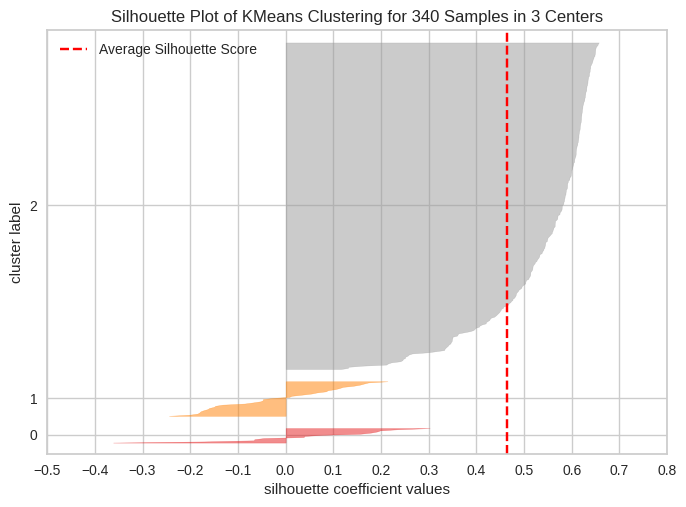

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
# Check for optimal number of clusters with silhouette plots
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

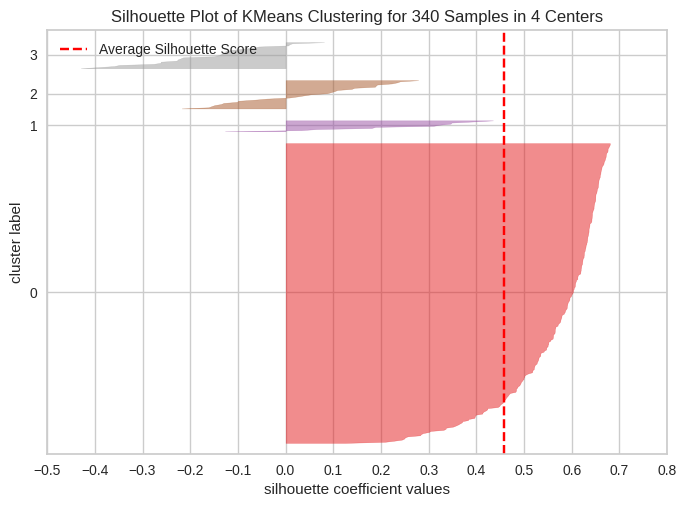

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
# Check for optimal number of clusters with silhouette plots
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()



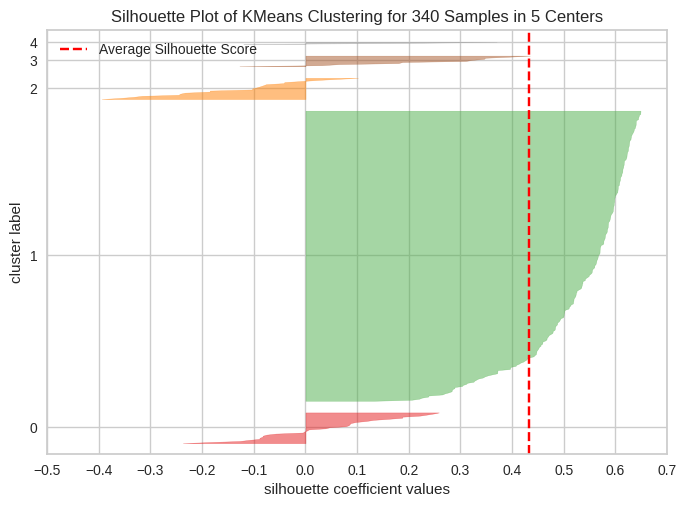

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
# Check for optimal number of clusters with silhouette plots
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### Create Final Model

We will use 4 as the appropriate number of clusters as the silhouette score is high enough (0.458), there is a clear bend in the elbow curve at 4.

In [56]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [57]:
# creating a copy of the original data
df1 = df.copy()


In [58]:
# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_  # scaled
df1["KM_segments"] = kmeans.labels_    # original

### Cluster Profiling

In [59]:
# Group by kmeans cluster labels
km_cluster_profile = df1.groupby("KM_segments").mean() # Group by the cluster labels

# Add counts for number of stocks in each cluster
km_cluster_profile["count_in_each_segment"] = df1.groupby("KM_segments")["Security"].count().values

In [60]:
# Display cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [61]:
# Print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 277
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 3, the following companies are present:
['Analog Devices, Inc.', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', 'Amazon.com Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 25
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 2, the following companies are present:
['Apache Corporation', 'Anadarko Petroleum Corp', 

In [62]:
#  Check the distribution of securities across different segments and sectors.

for k in range(0,df1['KM_segments'].nunique()):
    print('\033[1mCluster '+str(k)+'\033[0m TGICS Sector counts:')
    print(df1[df1['KM_segments']==k]['GICS Sector'].value_counts())
    print("   ")




Cluster 0 TGICS Sector counts:
Industrials                    52
Financials                     45
Consumer Discretionary         33
Health Care                    29
Real Estate                    26
Information Technology         24
Utilities                      24
Materials                      19
Consumer Staples               17
Energy                          6
Telecommunications Services     2
Name: GICS Sector, dtype: int64
   
Cluster 1 TGICS Sector counts:
Financials                     3
Health Care                    2
Telecommunications Services    2
Consumer Discretionary         1
Consumer Staples               1
Energy                         1
Information Technology         1
Industrials                    0
Materials                      0
Real Estate                    0
Utilities                      0
Name: GICS Sector, dtype: int64
   
Cluster 2 TGICS Sector counts:
Energy                         22
Information Technology          3
Industrials                   

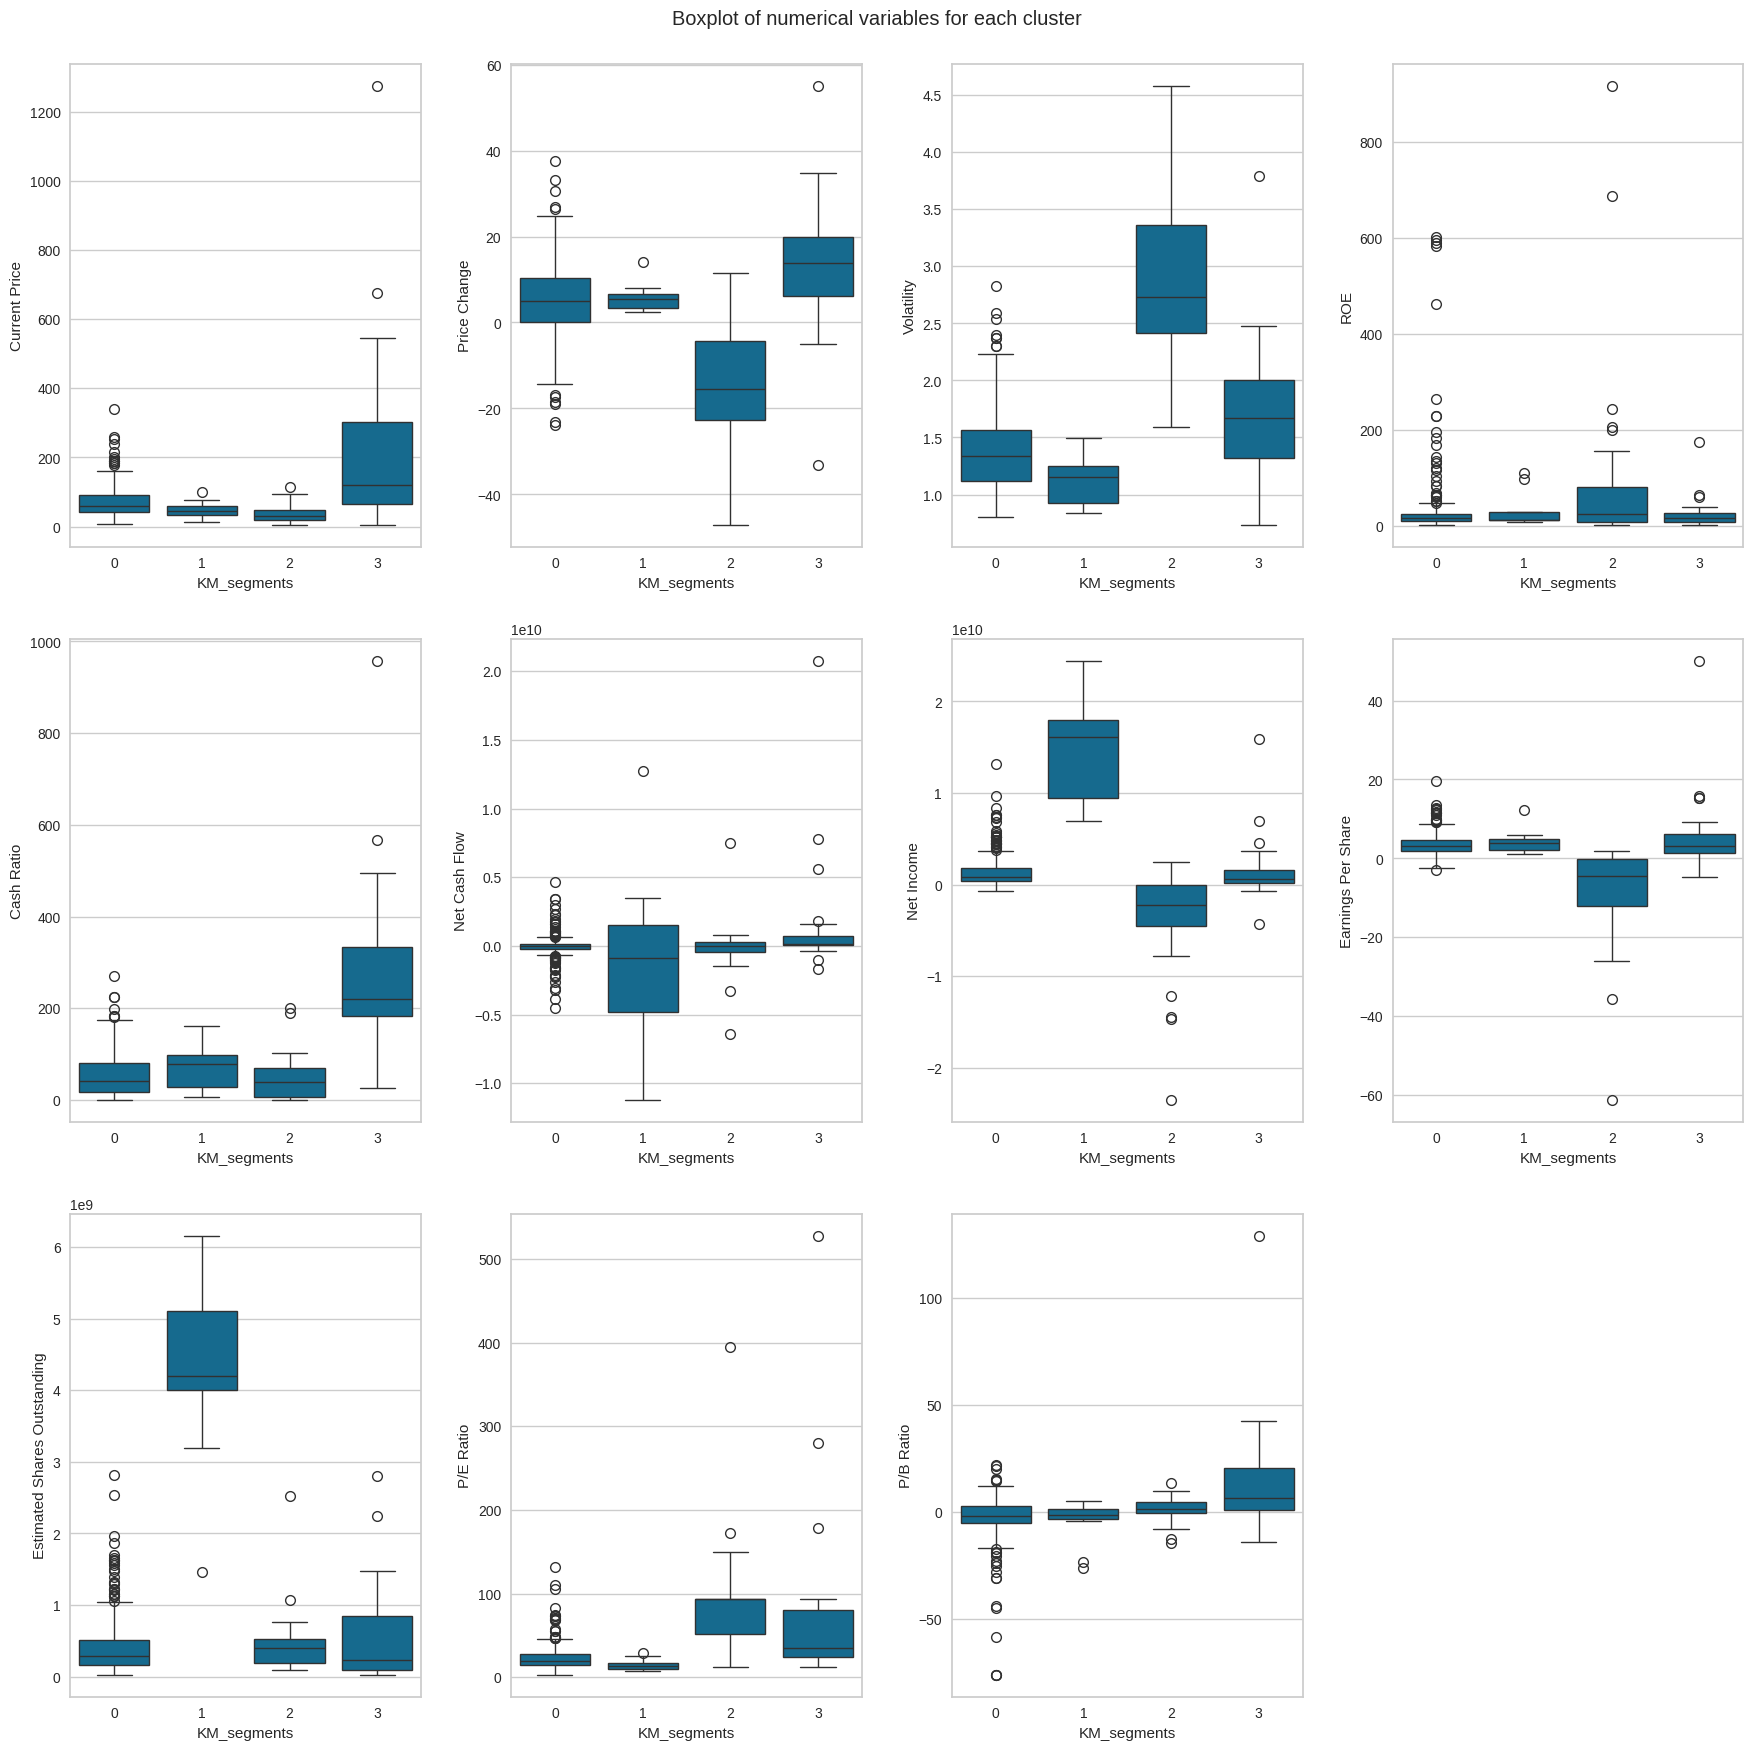

In [63]:
# generate boxplots for numerical variables within each cluster

plt.figure(figsize=(18, 18))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

In [64]:
# check the mean values of each numerical column for each cluster

cluster_profile = df1.groupby("KM_segments").mean()
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

<Axes: xlabel='KM_segments'>

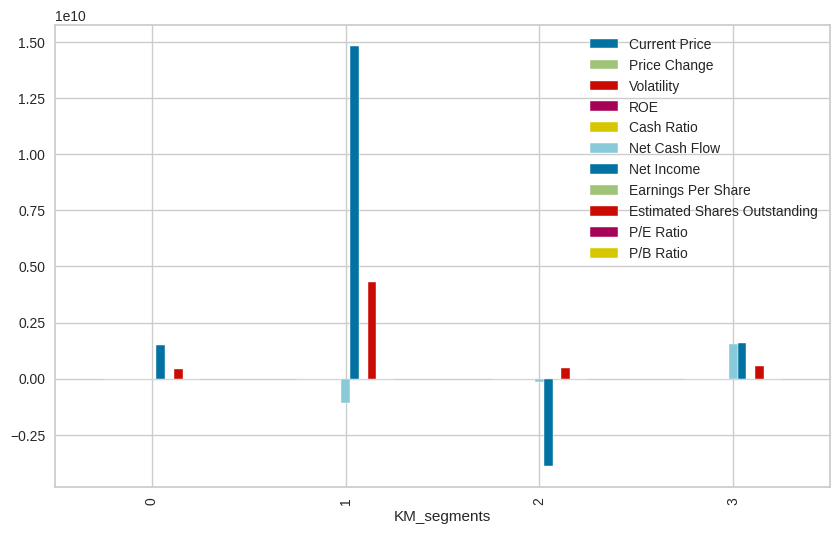

In [91]:
# visualize the mean values of each numerical column for each cluster
df1.groupby("KM_segments").mean().plot.bar(figsize=(10, 6))

### KMeans Clusters Observations

* Cluster 0 (277 stocks):
  * This is a diversified cluster. Many different sectors are represented with large counts, though more than 1/3 are Industrial and Financials.
  * This cluster comprises securities with a moderate current price of approximately \$72.40 and a positive price change of \$5.07.
  * The securities in this cluster exhibit relatively low volatility (1.39) and a solid return on equity (ROE) of around 34.62%.
  * They also maintain a healthy cash ratio of 53% and a net cash flow of approximately -\$14.05 million.
  * The cluster's net income stands at \$1.48 billion, with an earnings per share (EPS) of 3.62.
  * The estimated shares outstanding for these securities are around 438.53 million.
  * This cluster tends to have a moderate price-to-earnings (P/E) ratio of approximately 23.84 and a price-to-book (P/B) ratio of -3.36.



* Cluster 1 (11 stocks):

  * This is also diversified cluster withSeveral sectors represented, but with small counts.
  * Securities in this cluster have a lower current price of approximately \$50.52, accompanied by a higher price change of \$5.75.
  * They demonstrate moderate volatility (1.13) and a respectable ROE of approximately 31.09%.
  * Companies in this cluster tend to hold a higher cash ratio of around 75.91%. However, they exhibit a negative net cash flow of approximately -\$1.07 billion.
  * The net income for these securities is \$14.83 billion, translating to an EPS of 4.15.
  * The estimated shares outstanding are around 4.3 billion.
  * This cluster shows a lower P/E ratio of approximately 14.80 and a slightly higher P/B ratio of -4.55.





* Cluster 2 (27 stocks):
  * More than 80% of this cluster is made up of Energy stocks.
  * This cluster predominantly consists of securities with a lower current price of around \$38.10, and indicate a significant negative price change of approximately -\$15.37.
  * Securities in this cluster exhibit higher volatility (2.91) and an exceptionally high ROE of approximately 107.07%.
  * The cash ratio is moderately lower at 50.04%. However, the net cash flow for these securities is significantly negative, around -\$159.43 million.
  * The net income is also negative, approximately -\$3.89 billion, leading to a negative EPS of around -\$9.47.
  * The estimated shares outstanding are approximately 480.40 million.
  * This cluster shows a substantially higher P/E ratio of around 90.62 and a positive P/B ratio of 1.34.

* Cluster 3 (25 stocks):
  * 80% of the stocks in this cluster are in Health Care, Consumer Discretionary, and Information Technology
  * Securities in this cluster have a notably higher current price of approximately \$234.17, accompanied by a positive price change of \$13.40.
  * They exhibit moderate volatility (1.73) and a reasonable ROE of approximately 25.60%.
  * Companies in this cluster hold a significantly higher cash ratio of around 277.64%.
  * The net cash flow for these securities is positive, approximately \$1.55 billion.
  * The net income stands at \$1.57 billion, leading to an EPS of approximately 6.05.
  * The estimated shares outstanding are approximately 578.32 million.
  * This cluster shows a relatively higher P/E ratio of approximately 74.96 and a higher P/B ratio of 14.40.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [69]:
hc_df = subset_scaled_df.copy()

In [70]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

Observations:

*  We see that the cophenetic correlation is highest with **Euclidean distance and average linkage (0.9422)**. This indicates it performing exceptionally well at maintaining a high level of similarity between the original pairwise distances and those implied by the hierarchical clustering using average linkage.


**Explore different linkage methods with Euclidean distance only.**

In [68]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]


high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Dendrograms for the different linkage methods with Euclidean distance.**

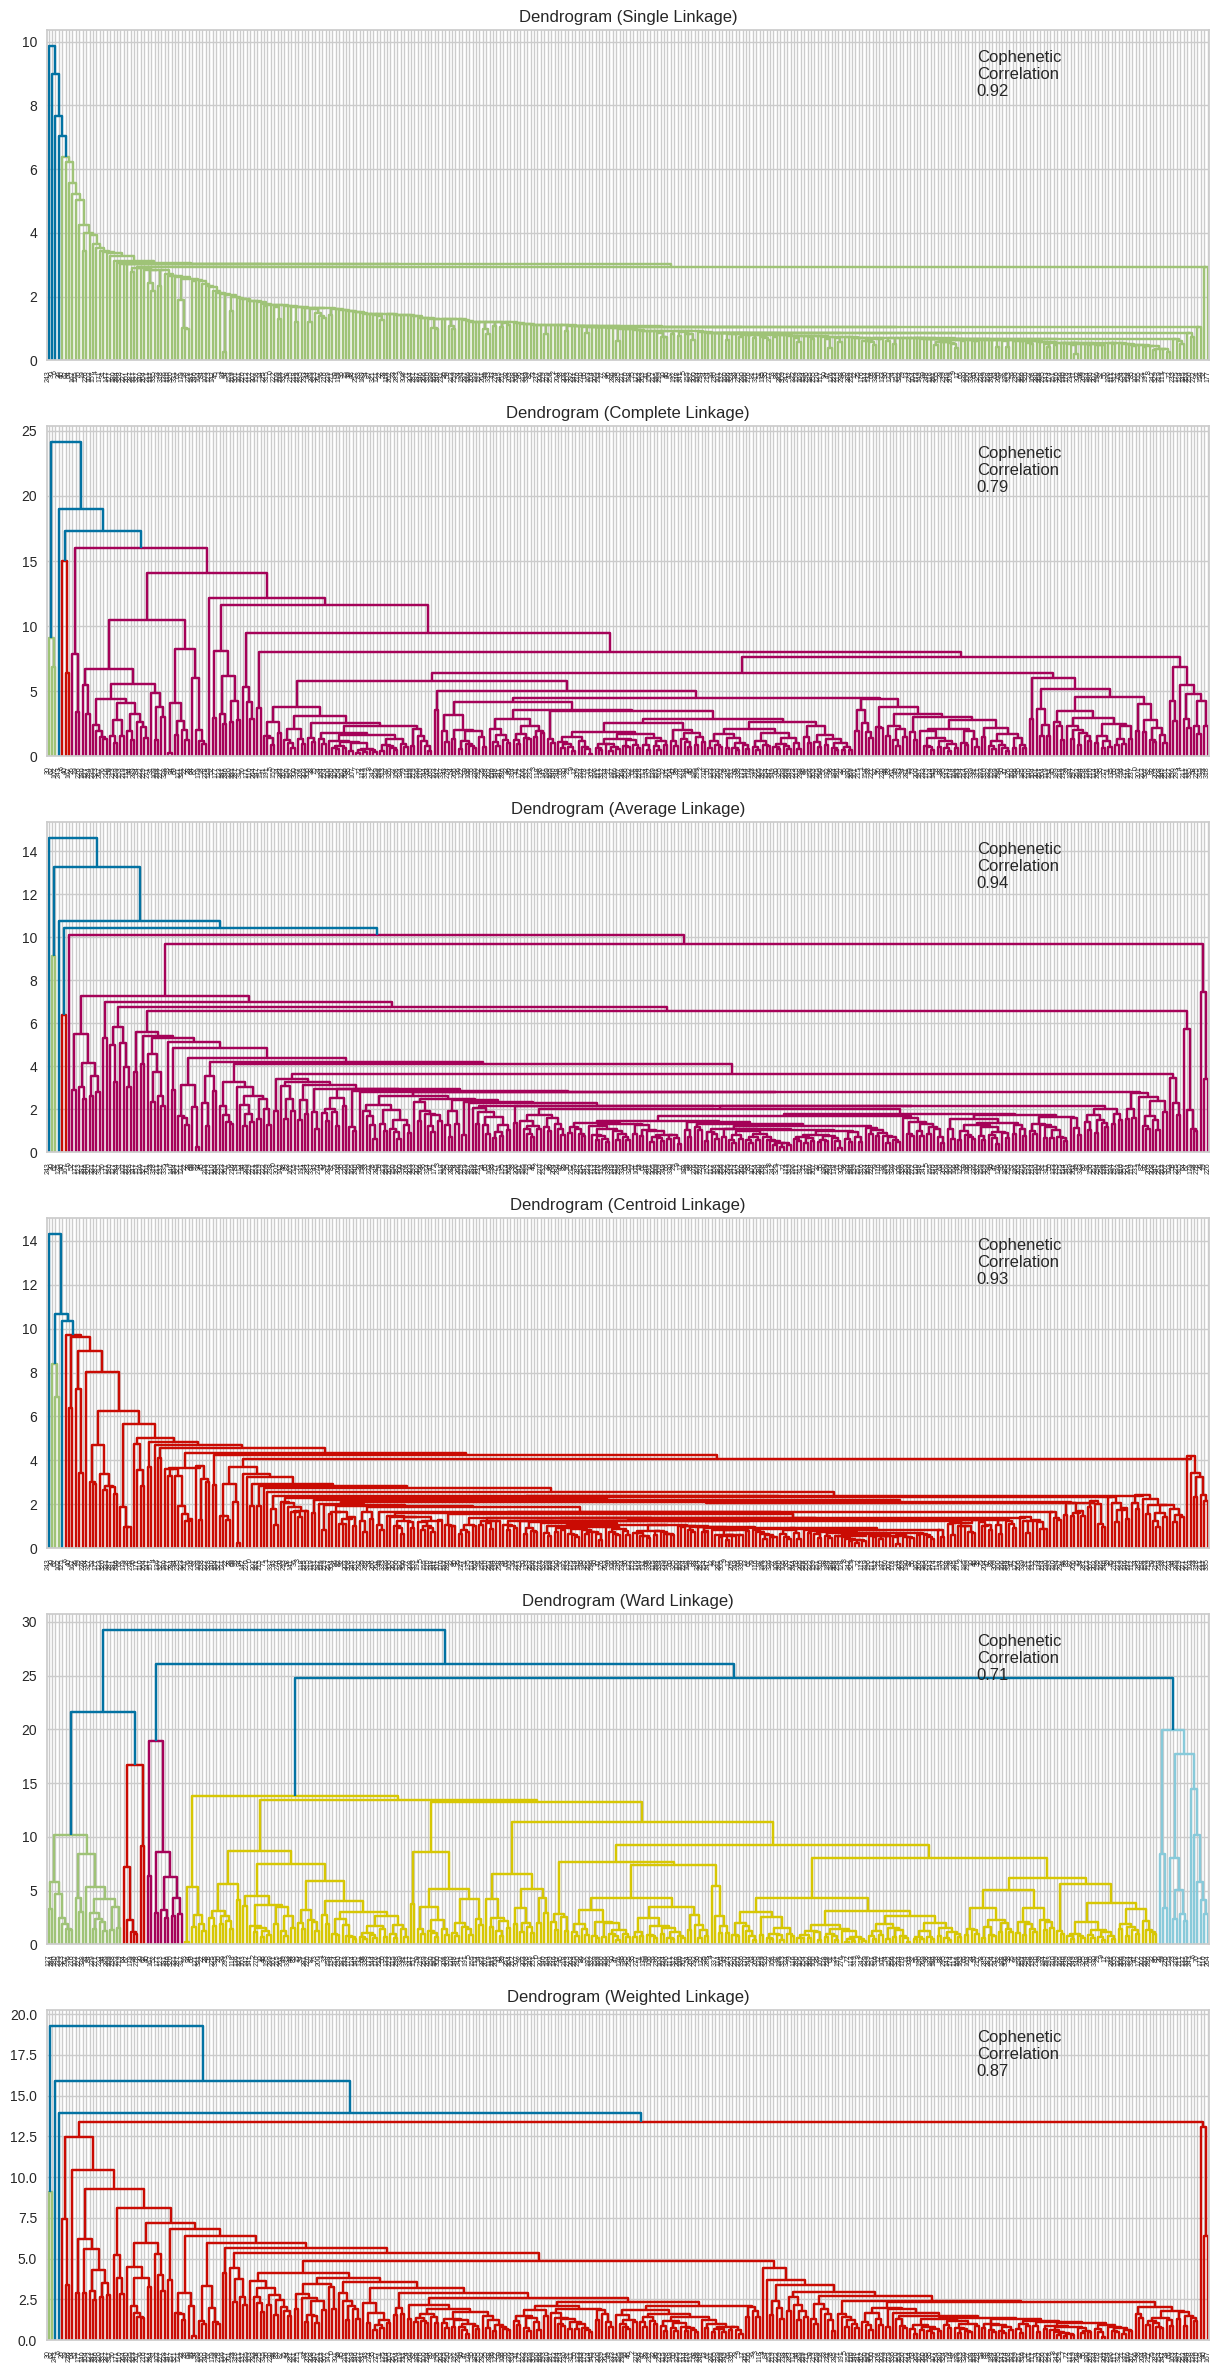

In [71]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [73]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.710118
1  complete                0.787328
5  weighted                0.869378
0    single                0.923227
3  centroid                0.931401
2   average                0.942254

### Creating model using sklearn

In [77]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [87]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [88]:
cluster_profile = df2.groupby("HC_Clusters").mean()

In [89]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Current Price"].count().values
)

In [90]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [91]:
# let's see the names of the securities in each cluster
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following securities are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following securities are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', ..., 'Yahoo Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 336
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 2, the following securities are present:
['Apache Corporation', 'Chesapeake Energy']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 3, the following securities are present:
['Facebook']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following securities ar

In [102]:
# df2.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

# print the number of stocks in each GICS sector for each cluster
for k in range(0,df2['HC_Clusters'].nunique()):
    print('\033[1mCluster '+str(k)+'\033[0m GICS Sector stock counts:')
    print(df2[df2['HC_Clusters']==k]['GICS Sector'].value_counts())
    print("   ")



Cluster 0 GICS Sector stock counts:
Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         39
Information Technology         32
Energy                         28
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64
   
Cluster 1 GICS Sector stock counts:
Consumer Discretionary         1
Consumer Staples               0
Energy                         0
Financials                     0
Health Care                    0
Industrials                    0
Information Technology         0
Materials                      0
Real Estate                    0
Telecommunications Services    0
Utilities                      0
Name: GICS Sector, dtype: int64
   
Cluster 2 GICS Sector stock counts:
Energy                         2
Consumer Discretionary         0
Consumer Staples 

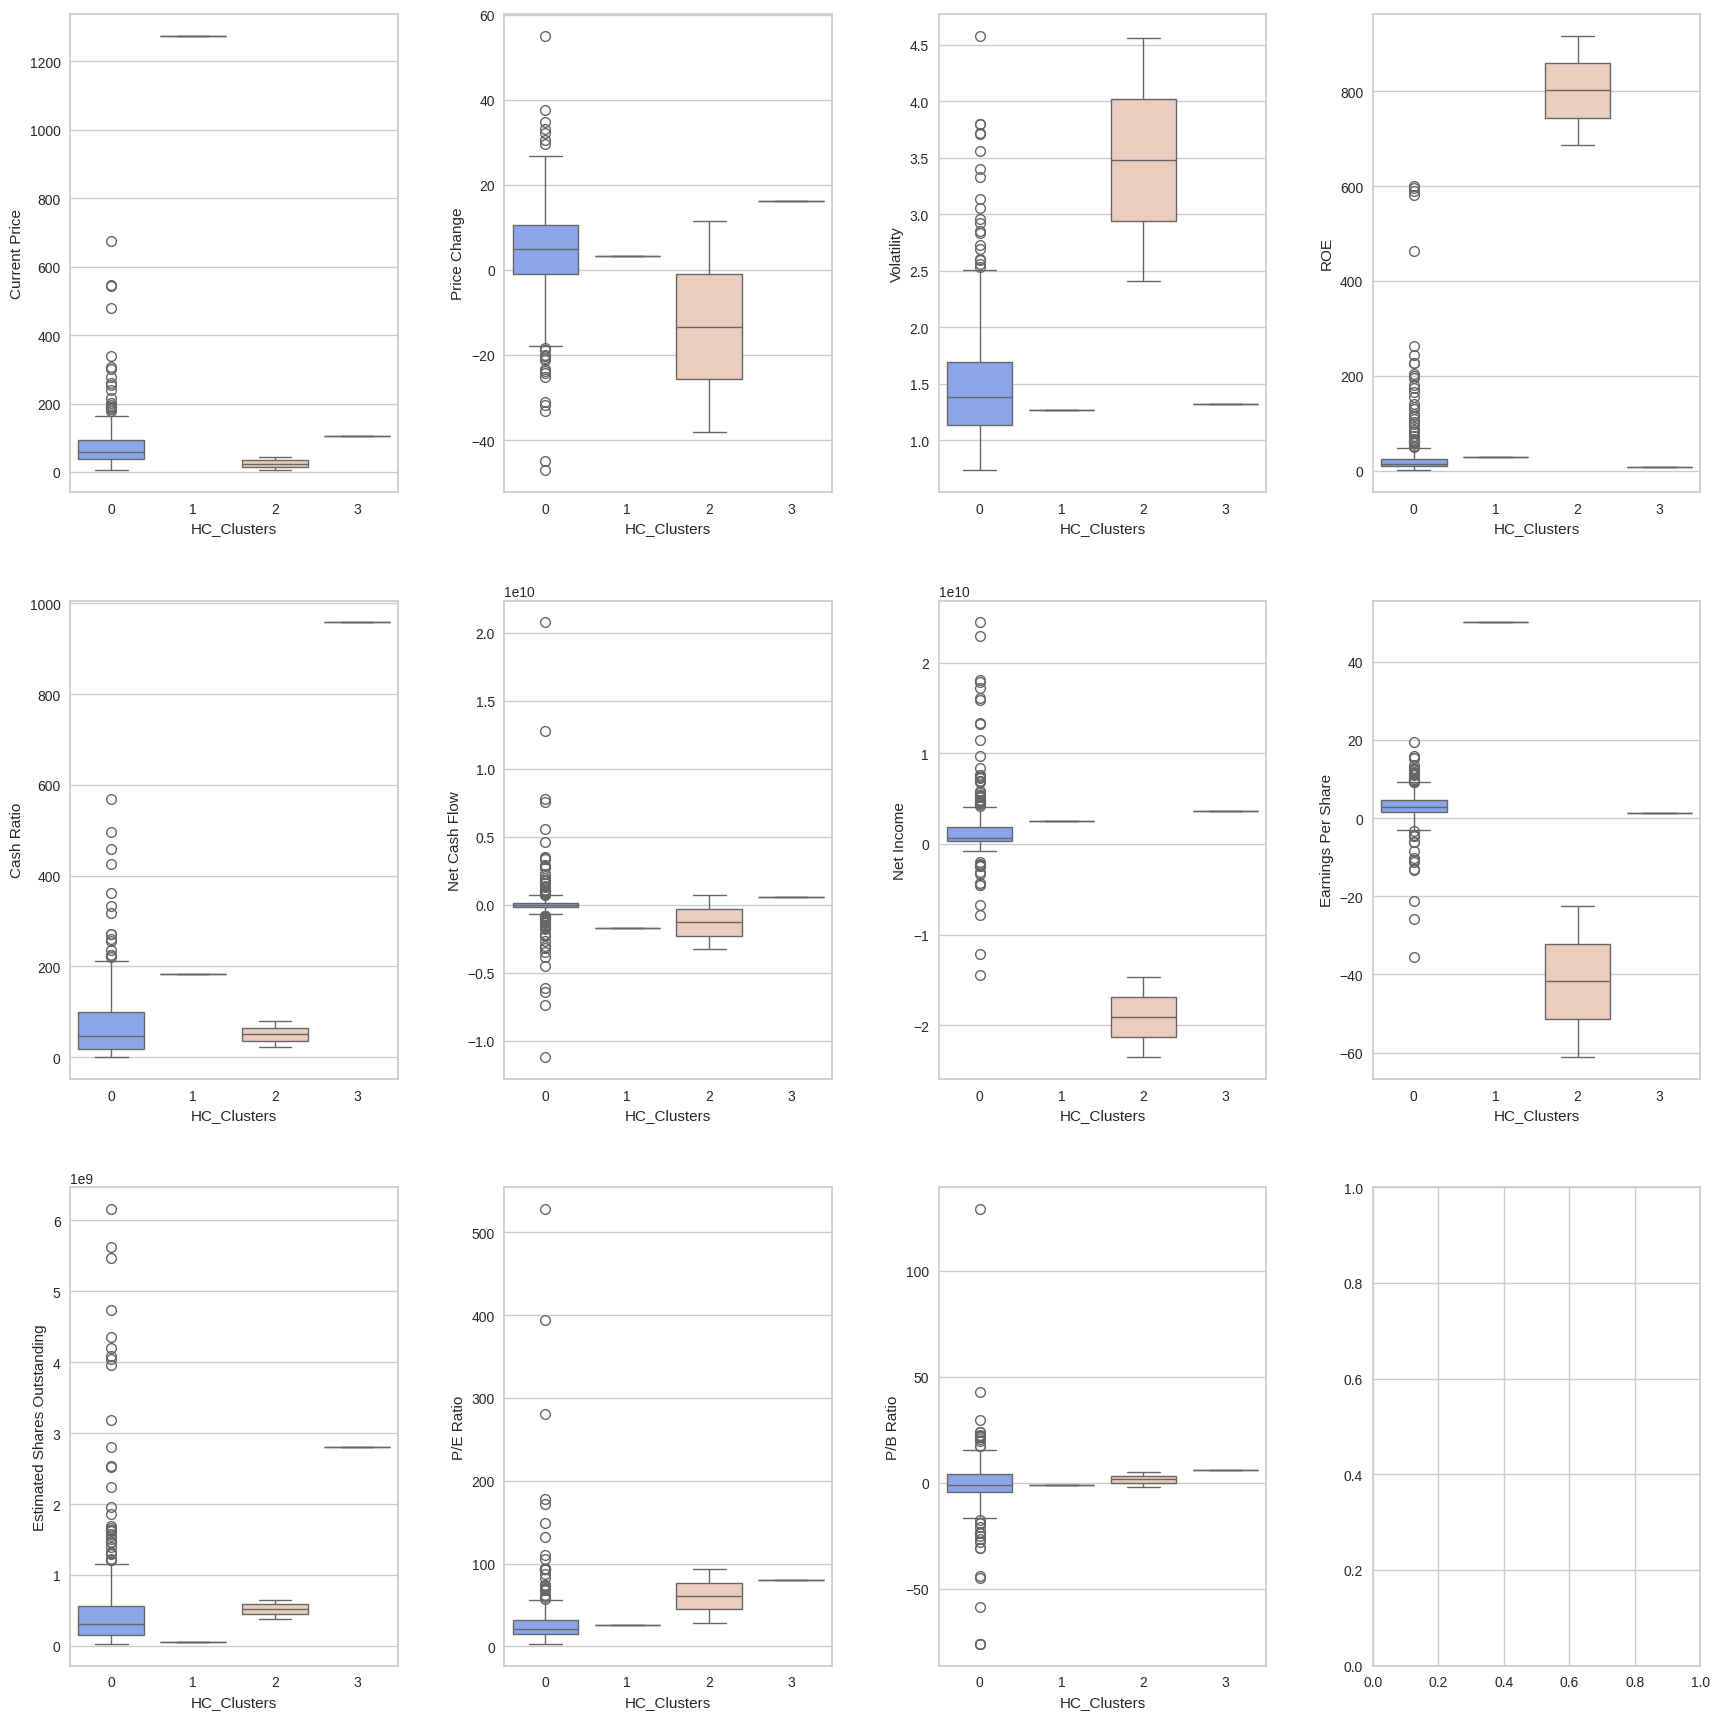

In [116]:
# boxplot of numerical variables for each cluster
fig, axes = plt.subplots(3, 4, figsize=(18, 18))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[3+counter],
                x="HC_Clusters",
                palette="coolwarm"
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)


<Axes: xlabel='HC_Clusters'>

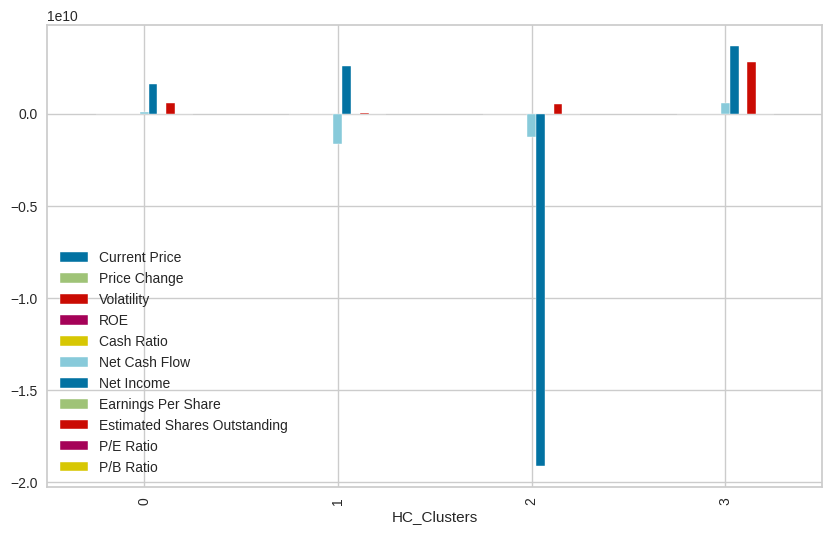

In [94]:
df2.groupby("HC_Clusters").mean().plot.bar(figsize=(10,6))

* Cluster 0 (336 securities):

  * This cluster is diverse, containing stocks from various sectors, with  significant representation from sectors such as Industrials, Financials, Health Care, Consumer Discretionary, and Information Technology.
  * This cluster comprises securities with a moderate current price of approximately \$77.57, demonstrating a positive price change of \$4.15.
  * Securities within this cluster exhibit relatively low volatility, measured at 1.52, indicating stability in their price movements.
  * Notably, these securities boast a solid return on equity (ROE) of around 35.18%, suggesting robust profitability.
  * With a healthy cash ratio of 67.15%, the securities in this cluster maintain ample liquidity.
  * The cluster's net cash flow amounts to approximately \$67.10 million, contributing to its financial strength.
  * The net income of securities in this cluster stands at \$1.61 billion, translating to an earnings per share (EPS) of \$2.91.
  * Considering the estimated shares outstanding of around 572.32 million, this cluster represents a significant market presence.
  * Investors may find the moderate price-to-earnings (P/E) ratio of approximately 32.33 and a price-to-book (P/B) ratio of -1.76 indicative of reasonable valuation.



* Cluster 1 (1 security):

  * This cluster is highly specialized, with a single stock from the Consumer Discretionary sector. It may represent a unique investment opportunity but lacks diversification.
  * This cluster consists of securities with a notably high current price of \$1274.95, accompanied by a positive price change of \$3.19.
  * Despite the high price, securities within this cluster demonstrate moderate volatility, measured at 1.27.
  * While the return on equity (ROE) stands at a respectable 29.00%, the most distinguishing feature is the remarkably high cash ratio of 184.00%, reflecting strong liquidity.
  * However, the cluster's net cash flow is negative, amounting to -\$1.67 billion, which may raise concerns about financial stability.
  * Notably, the net income of \$2.55 billion translates to a high earnings per share (EPS) of \$50.09.
  * With an estimated shares outstanding of approximately 50.94 million, securities in this cluster represent a relatively smaller market presence.
  * Despite the high price, the moderate price-to-earnings (P/E) ratio of 25.45 and a slightly undervalued price-to-book (P/B) ratio of -1.05 may indicate favorable valuation.


* Cluster 2 (2 securities):

  * This cluster contains only two stocks, both classified under the Energy sector, indicating a specialized portfolio. It may appeal to investors specifically interested in the energy industry but lacks diversification.
  * This cluster primarily consists of securities with a low current price of \$24.49, and indicates a significant negative price change of -\$13.35.
  * Securities in this cluster exhibit high volatility, measured at 3.48, suggesting considerable price fluctuations.
  * Despite the low price, these securities demonstrate an exceptionally high return on equity (ROE) of 802.00%, highlighting outstanding profitability.
  * However, the cluster's cash ratio is only moderate at 51.00%, and both the net cash flow and net income are negative, amounting to -\$1.29 billion and -\$19.11 billion, respectively.
  * As a result, the earnings per share (EPS) is also negative at -\$41.82.
  * With an estimated shares outstanding of approximately 519.57 million, securities in this cluster represent a significant market presence.
  * Investors should note the relatively high price-to-earnings (P/E) ratio of 60.75 and a positive price-to-book (P/B) ratio of 1.57, suggesting potential overvaluation.


* Cluster 3 (1 security):

  * Similar to Cluster 1, this cluster is highly specialized, with a single stock from the Information Technology sector. It may represent a niche investment opportunity within the technology industry but lacks diversification.
  * This cluster comprises securities with a moderate current price of \$104.66, accompanied by a positive price change of \$16.22.
  * Securities within this cluster exhibit moderate volatility, measured at 1.32, indicating stability in their price movements.
  * While the return on equity (ROE) is reasonable at 8.00%, the most notable feature is the exceptionally high cash ratio of 958.00%, underscoring strong liquidity.
  * Additionally, the cluster's net cash flow is positive, amounting to \$592.00 million, contributing to its financial strength.
  * The net income of \$3.67 billion translates to an earnings per share (EPS) of \$1.31.
  * With an estimated shares outstanding of approximately 280.08 million, securities in this cluster represent a moderate market presence.
  * Investors should consider the relatively high price-to-earnings (P/E) ratio of 79.89 and a moderately overvalued price-to-book (P/B) ratio of 5.88 when assessing valuation.


## K-means vs Hierarchical Clustering

**Which clustering technique took less time for execution?**
* KMeans was faster, which makes sense, though both methods completed rapidly.

**Which clustering technique gave you more distinct clusters, or are they the same?**
* Both clustering techniques resulted in 4 clusters.
* Both clustering techniques resulted in a high number of securities in Cluster 0.

**How many observations are there in the similar clusters of both algorithms?**

*In each case, Clusters 1, 2, and 3 were very specialized compared to Cluster 0.*

* In KMeans clustering:

  * Cluster 0 contains 336 securities.
  * Cluster 1 contains 11 securities.
  * Cluster 2 contains 27 securities.
  * Cluster 3 contains 25 securities.

* In Agglomerative clustering:

  * Cluster 0 contains 336 securities.
  * Cluster 1 contains 1 security.
  * Cluster 2 contains 2 securities.
  * Cluster 3 contains 1 security.



## Actionable Insights and Recommendations

*Here is a quick summary of the four clusters and their investment profiles:*

**Cluster 0:**
* Cluster profile
  * **Composition:** Diversified cluster with representation from various sectors, notably Industrial and Financials.
  * **Price Characteristics:** Moderate current price (\$72.40) with a positive price change (\$5.07).
  * **Financial Metrics:** Relatively low volatility (1.39) and solid return on equity (ROE) of around 34.62%.
  * **Liquidity and Cash Flow:** Healthy cash ratio (53%) but negative net cash flow (-$14.05 million).
  * **Earnings and Valuation:** Positive net income (\$1.48 billion) with moderate P/E ratio (23.84) and negative P/B ratio (-3.36).
* Investment Profile
  * **Investor Profile:** Conservative or moderate risk investor seeking stability and moderate returns.
  * **Reasons for Interest:** Diversified exposure across various sectors with relatively stable financial metrics and positive net income.
  * **Suitability:** Investors focused on long-term growth with a preference for established companies and moderate volatility.

**Cluster 1:**
* Cluster profile
  * **Composition:** Diversified cluster with representation from various sectors, though with smaller counts.
  * **Price Characteristics:** Lower current price (\$50.52) with a higher price change (\$5.75).
  * **Financial Metrics:** Moderate volatility (1.13) and respectable ROE (31.09%).
  * **Liquidity and Cash Flow:** Higher cash ratio (75.91%) but negative net cash flow (-\$1.07 billion).
  * **Earnings and Valuation:** Positive net income (\$14.83 billion) with lower P/E ratio (14.80) and slightly higher P/B ratio (-4.55).
* Investment Profile
  * **Investor Profile:** Value-oriented investor seeking potential undervalued stocks.
  * **Reasons for Interest:** Diversified exposure with smaller counts across sectors, offering potential opportunities for undervalued securities.
  * **Suitability:** Investors looking for bargains with lower P/E ratios and moderate volatility, willing to tolerate slightly higher risk for potential higher returns.


**Cluster 2:**
* Cluster profile
  * **Composition:** Predominantly Energy sector stocks.
  * **Price Characteristics:** Lower current price (\$38.10) with significant negative price change (-\$15.37).
  * **Financial Metrics:** Higher volatility (2.91) and exceptionally high ROE (107.07%).
  * **Liquidity and Cash Flow:** Moderately lower cash ratio (50.04%) with significantly negative net cash flow (-\$159.43 million).
  * **Earnings and Valuation:** Negative net income (-\$3.89 billion) with substantially higher P/E ratio (90.62) and positive P/B ratio (1.34).
* Investment Profile
  * **Investor Profile:** Aggressive or speculative investor willing to take on higher risk for potential high returns.
  * **Reasons for Interest:** Predominantly Energy sector stocks with high volatility and high ROE, potentially offering significant upside.
  * **Suitability:** Risk-tolerant investors seeking high-risk, high-reward opportunities and willing to closely monitor market trends and company performance.

**Cluster 3:**
* Cluster profile
  * **Composition:** Primarily Health Care, Consumer Discretionary, and Information Technology.
  * **Price Characteristics:** Higher current price (\$234.17) with a positive price change (/$13.40).
  * **Financial Metrics:** Moderate volatility (1.73) and reasonable ROE (25.60%).
  * **Liquidity and Cash Flow:** Significantly higher cash ratio (277.64%) with positive net cash flow (\$1.55 billion).
  * **Earnings and Valuation:** Positive net income (\$1.57 billion) with higher P/E ratio (74.96) and higher P/B ratio (14.40).
* Investment Profile
  * **Investor Profile:** Growth-oriented investor focusing on sectors like Health Care, Consumer Discretionary, and Information Technology.
  * **Reasons for Interest:** Exposure to sectors with growth potential, strong liquidity, and positive earnings.
  * **Suitability:** Investors seeking relatively lower risk within growth sectors, willing to pay higher valuation multiples for established companies with positive cash flows and growth prospects.



**General Insights**

  * Cluster 0 and Cluster 1: Moderate risk, with positive net income and relatively stable financial metrics. Cluster 1 might offer better value with lower P/E ratios.
  * Cluster 2: High risk due to negative earnings and substantial volatility. Investors should be cautious.
  * Cluster 3: Relatively lower risk with positive earnings and strong liquidity. However, valuation metrics like P/E and P/B ratios are higher, suggesting potentially higher prices relative to book value and earnings.

**Please note:**

As always, investors should consider their risk tolerance, investment goals, and sector preferences while evaluating these clusters for investment opportunities. Additionally, further analysis of individual stocks within each cluster is recommended for more informed decision-making.

In [117]:
# !jupyter nbconvert --to html "/content/drive/MyDrive/GL/Unsupervised Learning/Project - Trade and Ahead/USL_Project_LearnerNotebook_FullCode+29.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/GL/Unsupervised Learning/Project - Trade and Ahead/USL_Project_LearnerNotebook_FullCode+29.ipynb to html
[NbConvertApp] Writing 5011087 bytes to /content/drive/MyDrive/GL/Unsupervised Learning/Project - Trade and Ahead/USL_Project_LearnerNotebook_FullCode+29.html
